In [2]:
# Importing Packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# Importing Data
data_hedonic_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')
data_utilitarian_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')

In [4]:
# Filtering after only helpful reviews
data_hedonic = data_hedonic_raw[data_hedonic_raw['helpful_vote'] != 0]
data_utilitarian = data_utilitarian_raw[data_utilitarian_raw['helpful_vote'] != 0]

In [5]:
data = pd.concat([data_hedonic, data_utilitarian])

# 1. Product Overview

In [12]:
# Assuming df is your DataFrame containing the 'Product' column

# Get the unique products
unique_products = data['product'].unique()

# Print the unique products
print("Unique Products:")
for product in unique_products:
    print(product)


Unique Products:
Toilet Paper Unscented
Battery
Filter
Razor
Gaming Mouse
Hair Brush


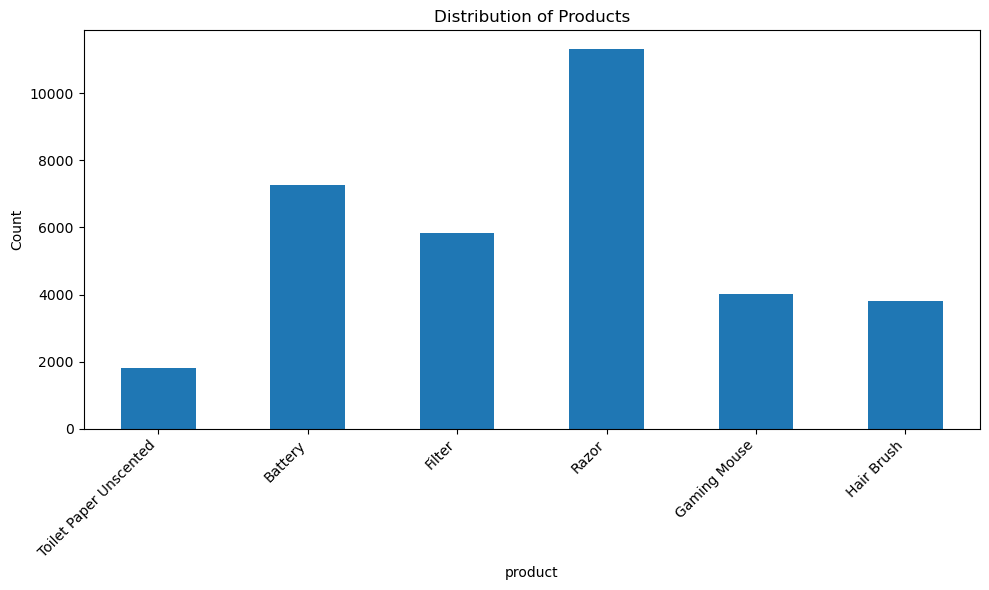

In [13]:
# Overview over product distribution
product_counts = data['product'].value_counts().reindex(unique_products, fill_value=0)

plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Distribution of Products')
plt.xlabel('product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


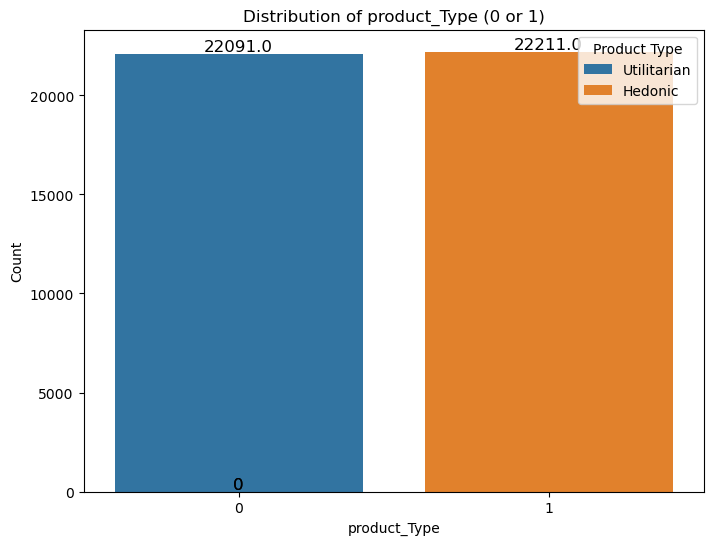

In [25]:
# Giving overview over the distribution of the product types 
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='prod_type', hue='prod_type')
plt.title('Distribution of product_Type (0 or 1)')
plt.xlabel('product_Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])

# Adding labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.legend(title='Product Type', labels=['Utilitarian', 'Hedonic'])
plt.show()


# 2. Summary statistic of features

### Functions for Building Summary statistic 

In [53]:
# Function for building summary statistics for numerical columns

def summary_statistic(df, groupby_column):
    # Define the numerical columns for which summary statistics will be calculated
    numerical_columns = ['rating', 'sentiment', 'subjective_score', 'word_count', 
                         'sent_count', 'sent_length', 'title_length', 'review_ext', 
                         '#adj', '#adv', '#nouns', 'elap_days', 'image', 'FRE']

    # Group by given column and calculate aggregate statistics
    summary_stats = df.groupby(groupby_column)[numerical_columns].agg(['mean', 'median', 'std'])

    # Flatten MultiIndex columns
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

    # Transposing the DataFrame
    summary_stats = summary_stats.transpose()

    return summary_stats

In [55]:
# Only calculate for the mean of the numerical columns

def calculate_mean(df, groupby_column):
    # Group by the specified column and calculate aggregate statistics
    summary_mean = df.groupby(groupby_column).agg({
        'rating': ['mean'],
        'review_ext': ['mean'],
        'sentiment': ['mean'],
        'subjective_score': ['mean'],
        'word_count': ['mean'],
        'sent_count': ['mean'],
        'sent_length': ['mean'],
        'title_length': ['mean'],
        'FRE': ['mean'],
        '#adj': ['mean'],
        '#adv': ['mean'],
        '#nouns': ['mean'],
        'elap_days': ['mean'],
    })

    # Flatten the MultiIndex columns
    summary_mean.columns = ['_'.join(col).strip() for col in summary_mean.columns.values]

    # Transpose the DataFrame
    summary_mean = summary_mean.transpose()

    return summary_mean

### Summary Statistic of Helpful Reviews

In [30]:
# Filtering after helpful reviews
data_helpful = data[data['helpful_vote'] != 0]

# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'prod_type')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_ProdType_mean.csv')

prod_type                        0            1
rating_mean               2.977031     3.827217
review_ext_mean          -1.637611    -0.792044
sentiment_mean            3.003445     3.895794
subjective_score_mean     0.786528     0.820668
word_count_mean          65.953201    51.973212
sent_count_mean           4.239449     3.738280
sent_length_mean         17.999560    16.065267
title_length_mean         1.267873     1.392714
FRE_mean                 10.301847     9.636606
#adj_mean                 0.094248     0.099153
#adv_mean                 0.078822     0.069240
#nouns_mean               0.188966     0.183678
elap_days_mean         1179.186334  1537.530405


In [15]:
# Filtering after helpful reviews
data_helpful = data[data['helpful_vote'] != 0]

# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'main_category')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Category_mean.csv')

main_category           Appliances       Beauty  Electronics     Grocery  \
rating_mean               2.476945     4.029299     2.738172    3.794175   
review_ext_mean          -2.223055    -0.511635    -1.895334   -1.005825   
sentiment_mean            2.540346     4.076433     2.753727    3.850485   
subjective_score_mean     0.782660     0.822641     0.770538    0.811931   
word_count_mean          66.293948    50.508705    78.068049   36.056311   
sent_count_mean           4.582133     3.703185     4.497732    2.970874   
sent_length_mean         17.369808    15.987720    19.940473   14.850922   
title_length_mean         1.276657     1.264544     1.244329    1.588350   
FRE_mean                  9.195147     9.031607    11.423204    9.886318   
#adj_mean                 0.077066     0.100521     0.087783    0.106944   
#adv_mean                 0.070864     0.072464     0.081020    0.061718   
#nouns_mean               0.200178     0.181957     0.189018    0.186514   
elap_days_me

In [16]:
# Filtering after helpful reviews Data Hedonic
data_helpful_hedonic = data_hedonic[data_hedonic['helpful_vote'] != 0]

# Summary of data after helpful reviews
summary_help_hedonic = calculate_mean(data_helpful_hedonic, 'product')

# Display the DataFrame
print(summary_help_hedonic)

# Saving to CSV
summary_help_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Hedonic_mean.csv')

product                 Chocolate  Facial Spray       Music      Perfume  \
rating_mean              3.794175      4.125809    2.788835     3.890041   
review_ext_mean         -1.005825     -0.374191   -1.854369    -0.709959   
sentiment_mean           3.850485      4.186916    3.099515     3.917012   
subjective_score_mean    0.811931      0.827764    0.834365     0.815249   
word_count_mean         36.056311     49.777858   59.754854    51.563278   
sent_count_mean          2.970874      3.651330    4.553398     3.778008   
sent_length_mean        14.850922     15.282321   14.936046    17.005573   
title_length_mean        1.588350      1.258807    1.771845     1.272822   
FRE_mean                 9.886318      8.628544    8.686543     9.612691   
#adj_mean                0.106944      0.098948    0.100891     0.102790   
#adv_mean                0.061718      0.071686    0.068062     0.073585   
#nouns_mean              0.186514      0.183758    0.169652     0.179359   
elap_days_me

In [17]:
# Filtering after helpful reviews Data Utilitarian
data_helpful_utilitarian = data_utilitarian[data_utilitarian['helpful_vote'] != 0]

# Summary of data after helpful reviews
summary_help_ut = calculate_mean(data_helpful_utilitarian, 'product')

# Display the DataFrame
print(summary_help_ut)

# Saving to CSV
summary_help_ut.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Utilitarian_mean.csv')

product                    Battery       Filter  Gaming Mouse   Hair Brush  \
rating_mean               2.823587     2.476945      2.568665     4.126606   
review_ext_mean          -1.776413    -2.223055     -2.131335    -0.473394   
sentiment_mean            2.811891     2.540346      2.638298     4.099083   
subjective_score_mean     0.758146     0.782660      0.795130     0.840303   
word_count_mean          57.078947    66.293948    119.721470    70.255046   
sent_count_mean           3.787524     4.582133      5.907157     4.737615   
sent_length_mean         17.435040    17.369808     24.912571    17.373802   
title_length_mean         1.277778     1.276657      1.177950     1.260550   
FRE_mean                 11.123231     9.195147     11.655892     8.243113   
#adj_mean                 0.087137     0.077066      0.089066     0.101447   
#adv_mean                 0.085709     0.070864      0.071713     0.075413   
#nouns_mean               0.187080     0.200178      0.192862   

### Analyzing Mean of Review Data

In [ ]:
# Calculating Mean for Data after Main category 
summary_mean = calculate_mean(data, 'main_category')

# Display the summary statistics
print(summary_mean)

# Saving to CSV
summary_mean.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Category_mean.csv')

In [ ]:
# Calculating Mean after Producty Type and Data 
summary_stats_data = calculate_mean(data, 'prod_type')

# Print the summary statistics
print(summary_stats_data)

# Saving to CSV
summary_stats_data.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType_mean.csv')

In [9]:
# Calculating Mean for hedonic products and product
summary_stats_hedonic = calculate_mean(data_hedonic, 'product')

# Display results
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic_mean.csv')

product                 Chocolate  Facial Spray       Music      Perfume  \
rating_mean              4.474078      4.308369    3.935466     4.331574   
review_ext_mean         -0.325922     -0.191631   -0.710887    -0.268426   
sentiment_mean           4.397465      4.350447    3.953423     4.353908   
subjective_score_mean    0.801484      0.818202    0.815490     0.786802   
word_count_mean         20.061636     31.008322   30.569024    23.050804   
sent_count_mean          2.101959      2.688491    2.757015     2.201743   
sent_length_mean        10.914960     12.767286   12.095315    11.561729   
title_length_mean        1.848502      1.530853    1.771605     1.486931   
FRE_mean                10.780224      8.841752    8.569474     9.710575   
#adj_mean                0.123170      0.110738    0.112691     0.136004   
#adv_mean                0.065560      0.071838    0.065428     0.074773   
#nouns_mean              0.196852      0.184495    0.180247     0.193071   
elap_days_me

In [10]:
# Calculating Mean for utilitarian products and product
summary_stats_utilitarian = calculate_mean(data_utilitarian, 'product')

# Display results
print(summary_stats_utilitarian)

# Saving to CSV
summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian_mean.csv')

product                    Battery       Filter  Gaming Mouse   Hair Brush  \
rating_mean               3.900000     3.976762      3.799502     4.467546   
review_ext_mean          -0.700000    -0.723238     -0.900498    -0.132454   
sentiment_mean            3.860744     3.890148      3.754229     4.427968   
subjective_score_mean     0.755289     0.784201      0.819381     0.848176   
word_count_mean          27.823554    27.149222     64.438557    38.513193   
sent_count_mean           2.346694     2.410601      3.798259     3.161741   
sent_length_mean         12.732280    11.769526     19.429140    13.416405   
title_length_mean         1.328099     1.406952      1.297015     1.337995   
FRE_mean                 10.795523     9.031148     10.846105     7.639843   
#adj_mean                 0.113635     0.125071      0.108843     0.118827   
#adv_mean                 0.095707     0.071731      0.074194     0.079909   
#nouns_mean               0.195111     0.196057      0.200407   

### Total Analysis (mean, median, variance)

In [16]:
# Summary of hedonic data
summary_stats_hedonic = summary_statistic(data_hedonic, 'product')

# Display the summary statistics
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic.csv')


product                   Chocolate  Facial Spray       Music      Perfume  \
rating_mean                4.474078      4.308369    3.935466     4.331574   
rating_median              5.000000      5.000000    5.000000     5.000000   
rating_std                 1.183735      1.264015    1.514960     1.228851   
sentiment_mean             4.397465      4.350447    3.953423     4.353908   
sentiment_median           5.000000      5.000000    5.000000     5.000000   
sentiment_std              1.297061      1.301683    1.517840     1.263092   
subjective_score_mean      0.801484      0.818202    0.815490     0.786802   
subjective_score_median    0.926969      0.908884    0.916730     0.883454   
subjective_score_std       0.252230      0.206639    0.227764     0.230703   
word_count_mean           20.061636     31.008322   30.569024    23.050804   
word_count_median         13.000000     21.000000   16.000000    14.000000   
word_count_std            23.886115     37.767972   48.723164   

In [18]:
# Summary of utilitarian data
summary_stats_utilitarian = summary_statistic(data_utilitarian, 'product')

# Display the DataFrame
print(summary_stats_utilitarian)

summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian.csv')

product                      Battery       Filter  Gaming Mouse   Hair Brush  \
rating_mean                 3.900000     3.976762      3.799502     4.467546   
rating_median               5.000000     5.000000      5.000000     5.000000   
rating_std                  1.552382     1.572562      1.561097     1.114636   
sentiment_mean              3.860744     3.890148      3.754229     4.427968   
sentiment_median            5.000000     5.000000      5.000000     5.000000   
sentiment_std               1.676241     1.661475      1.604700     1.190469   
subjective_score_mean       0.755289     0.784201      0.819381     0.848176   
subjective_score_median     0.830232     0.851860      0.885371     0.921056   
subjective_score_std        0.233592     0.209121      0.186372     0.175156   
word_count_mean            27.823554    27.149222     64.438557    38.513193   
word_count_median          17.000000    15.000000     40.000000    26.000000   
word_count_std             36.151449    

In [20]:
# Summary of data after Product Type
summary_stats_prodType = summary_statistic(data, 'prod_type')

# Display the DataFrame
print(summary_stats_prodType)

#Saving to CSV
summary_stats_prodType.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType.csv')

prod_type                          0            1
rating_mean                 3.982482     4.321237
rating_median               5.000000     5.000000
rating_std                  1.511750     1.266600
review_ext_mean            -0.651075    -0.307033
review_ext_median           0.300000     0.200000
review_ext_std              1.513901     1.265759
sentiment_mean              3.931556     4.328306
sentiment_median            5.000000     5.000000
sentiment_std               1.600143     1.311158
subjective_score_mean       0.790767     0.801894
subjective_score_median     0.866606     0.902643
subjective_score_std        0.210857     0.228401
word_count_mean            35.892490    26.722030
word_count_median          20.000000    16.000000
word_count_std             49.580472    39.059654
sent_count_mean             2.763478     2.411868
sent_count_median           2.000000     2.000000
sent_count_std              2.536034     2.157740
sent_length_mean           13.790704    12.026284


# 3. Correlation Analysis with output variable helpful-ratio

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


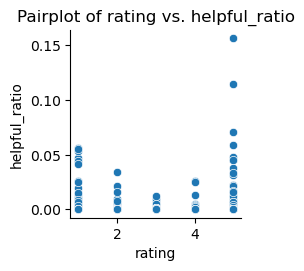

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


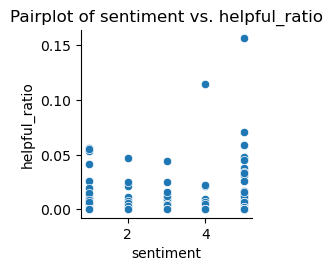

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


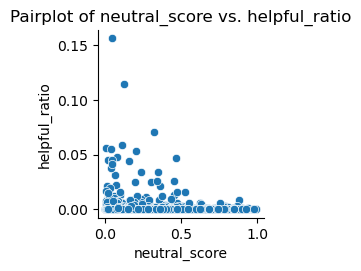

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


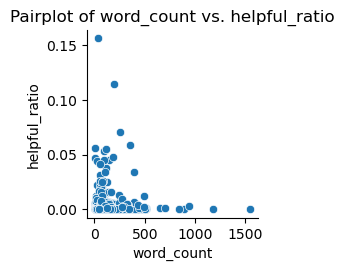

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


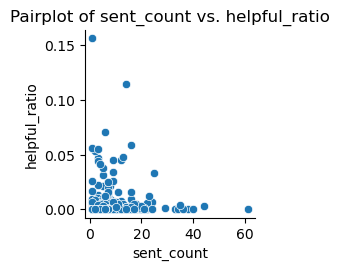

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


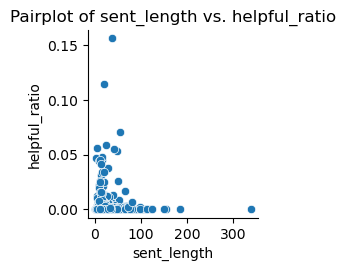

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


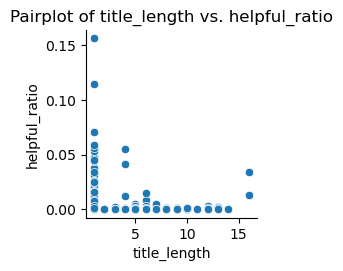

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


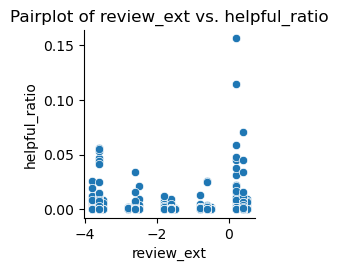

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


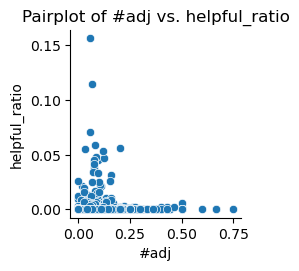

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


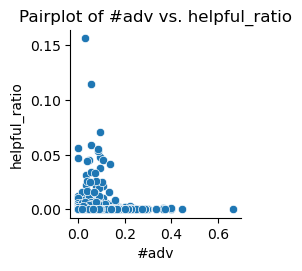

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


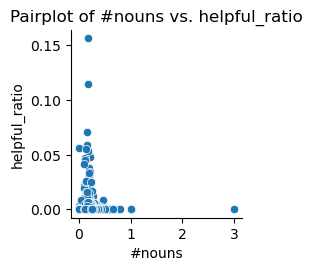

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


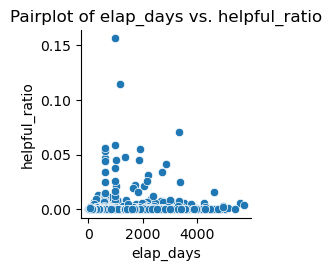

helpful_ratio    1.000000
sent_count       0.102528
word_count       0.100083
sent_length      0.057279
title_length     0.022084
neutral_score   -0.011387
#adv            -0.017514
#adj            -0.019712
#nouns          -0.027260
sentiment       -0.037057
elap_days       -0.038411
rating          -0.043837
review_ext      -0.050061
Name: helpful_ratio, dtype: float64


In [16]:
# Determining Features 
features= ['rating', 'sentiment', 'neutral_score', 'word_count',  'sent_count', 'sent_length', 'title_length', 'review_ext', 
           '#adj', '#adv', '#nouns', 'elap_days']

# Pairplot: Visualizing pairwise relationships between features and the output variable

data_hedonic = data_hedonic [data_hedonic['helpful_vote'] != 0]

for covariate in features:
    sns.pairplot(data_hedonic, x_vars=[covariate], y_vars=['helpful_ratio'])
    plt.title(f'Pairplot of {covariate} vs. helpful_ratio')
    plt.show()

# Correlation between features and output variable
corr_with_output = data_hedonic[features + ['helpful_ratio']].corr()['helpful_ratio'].sort_values(ascending=False)
print(corr_with_output)

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


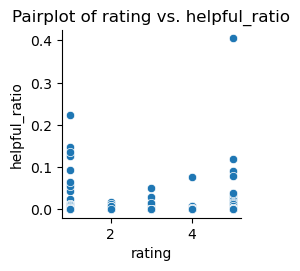

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


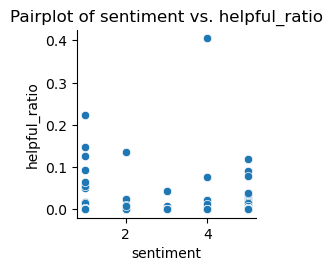

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


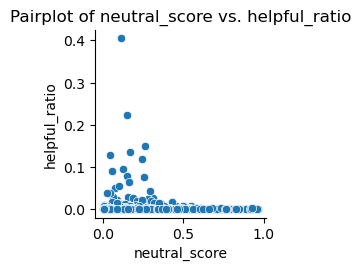

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


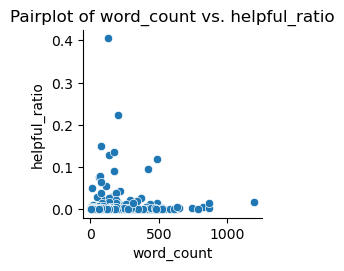

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


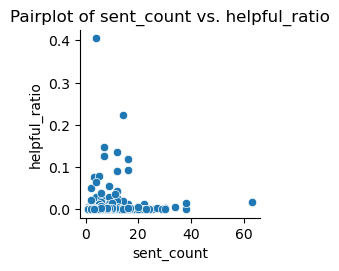

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


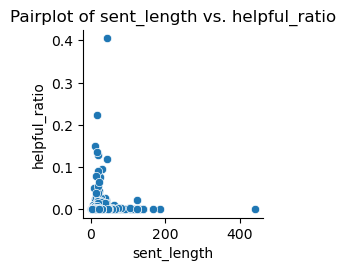

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


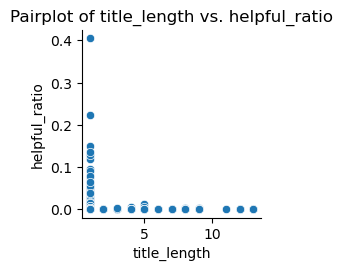

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


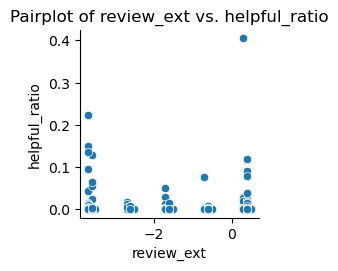

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


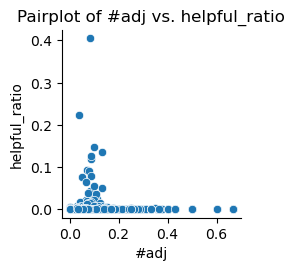

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


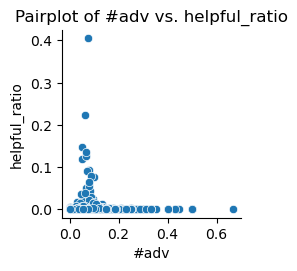

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


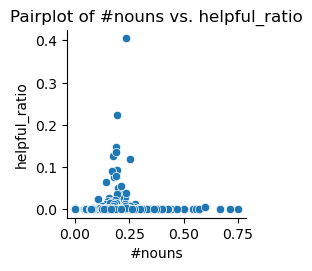

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


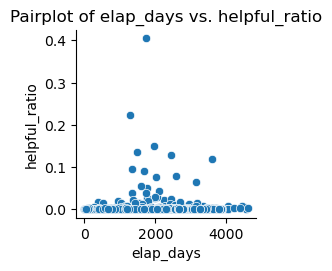

helpful_ratio    1.000000
word_count       0.121082
sent_count       0.107141
elap_days        0.060848
sent_length      0.043973
#nouns           0.008910
rating           0.007897
review_ext       0.005610
sentiment        0.002189
#adv            -0.011236
title_length    -0.013712
#adj            -0.013860
neutral_score   -0.023752
Name: helpful_ratio, dtype: float64


In [6]:
# Determinin Features 
features= ['rating', 'sentiment', 'neutral_score', 'word_count',  'sent_count', 'sent_length', 'title_length', 'review_ext', 
           '#adj', '#adv', '#nouns', 'elap_days']

# Pairplot: Visualizing pairwise relationships between features and the output variable

data_utilitarian = data_utilitarian [data_utilitarian['helpful_vote'] != 0]

for covariate in features:
    sns.pairplot(data_utilitarian, x_vars=[covariate], y_vars=['helpful_ratio'])
    plt.title(f'Pairplot of {covariate} vs. helpful_ratio')
    plt.show()

# Correlation between features and output variable
corr_with_output = data_utilitarian[features + ['helpful_ratio']].corr()['helpful_ratio'].sort_values(ascending=False)
print(corr_with_output)

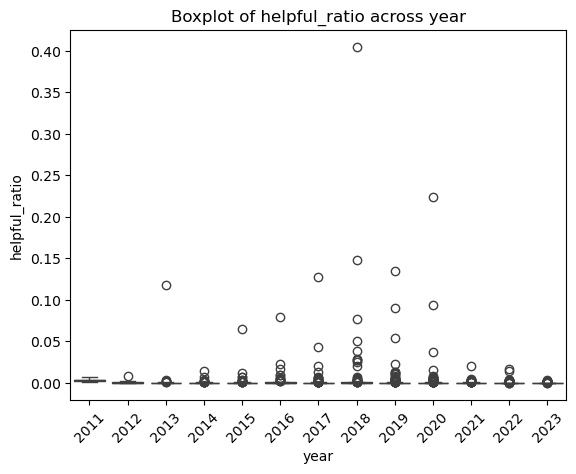

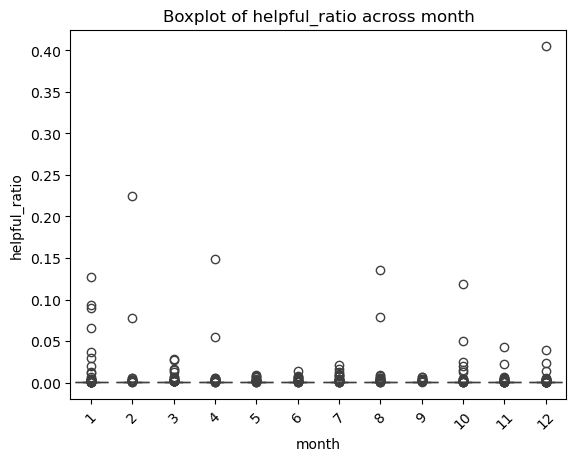

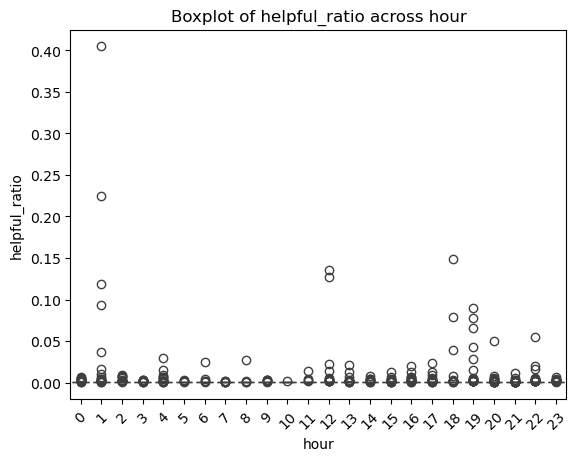

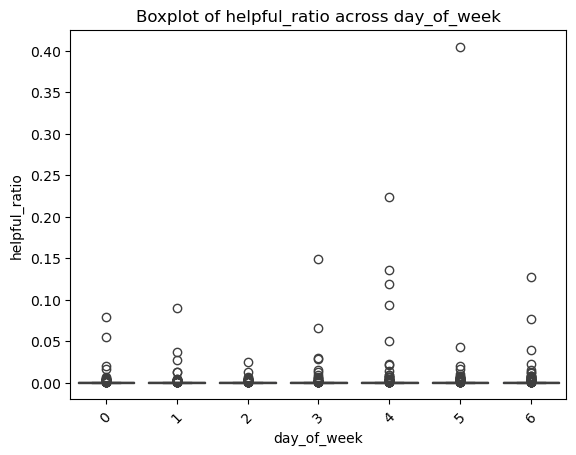

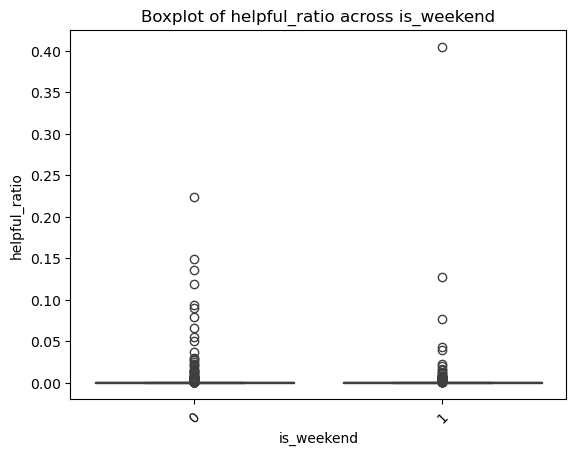

helpful_ratio    1.000000
day_of_week      0.030047
is_weekend       0.018645
month           -0.005681
hour            -0.031428
year            -0.059390
Name: helpful_ratio, dtype: float64


In [9]:
# Influence of time Factors 

# Boxplot: Visualizing the distribution of the output variable across different levels of year features
categorical_features = ['year', 'month', 'hour', 'day_of_week','is_weekend',]  # Assuming these are categorical
for feature in categorical_features:
    sns.boxplot(x=feature, y='helpful_ratio', data=data_utilitarian)
    plt.title(f'Boxplot of helpful_ratio across {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Correlation between features and output variable
corr_with_output = data_utilitarian[categorical_features + ['helpful_ratio']].corr()['helpful_ratio'].sort_values(ascending=False)
print(corr_with_output)

# Analysis for each data set

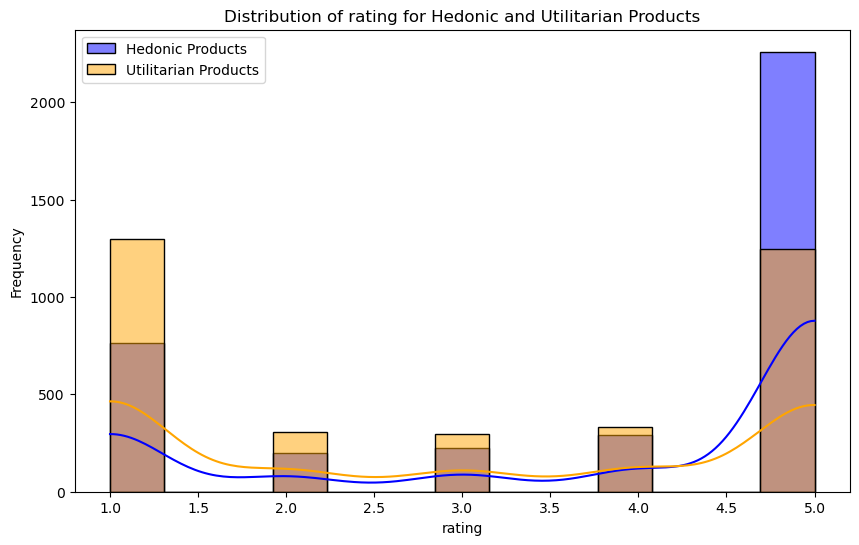

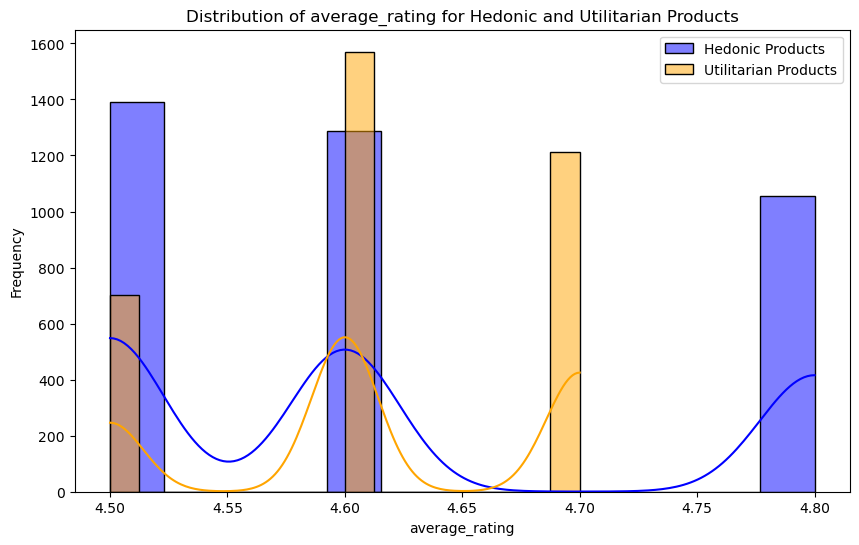

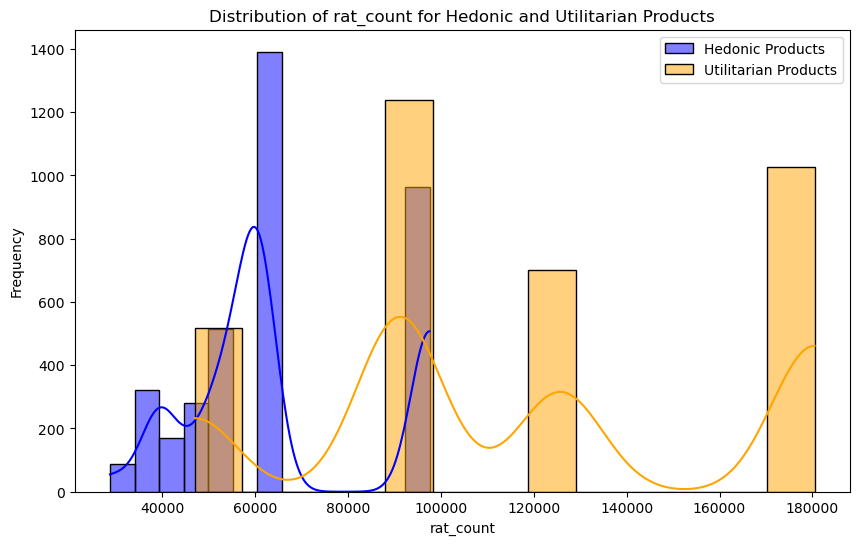

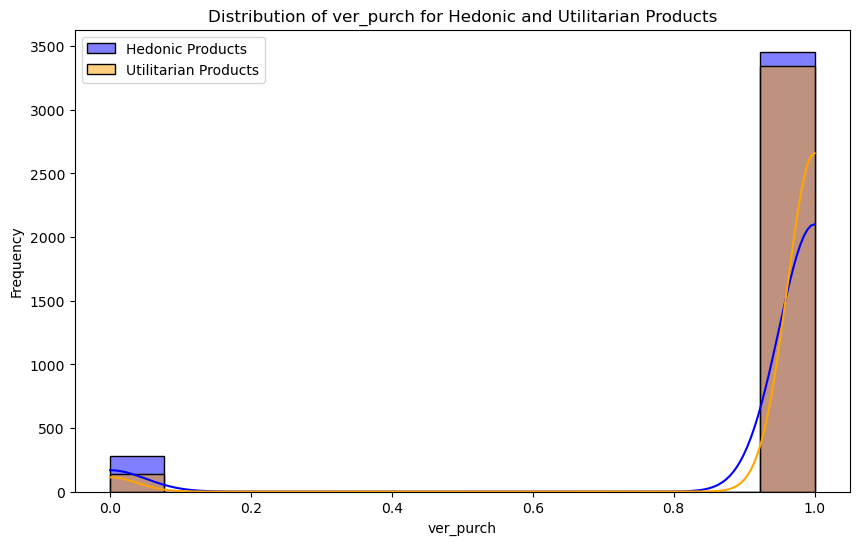

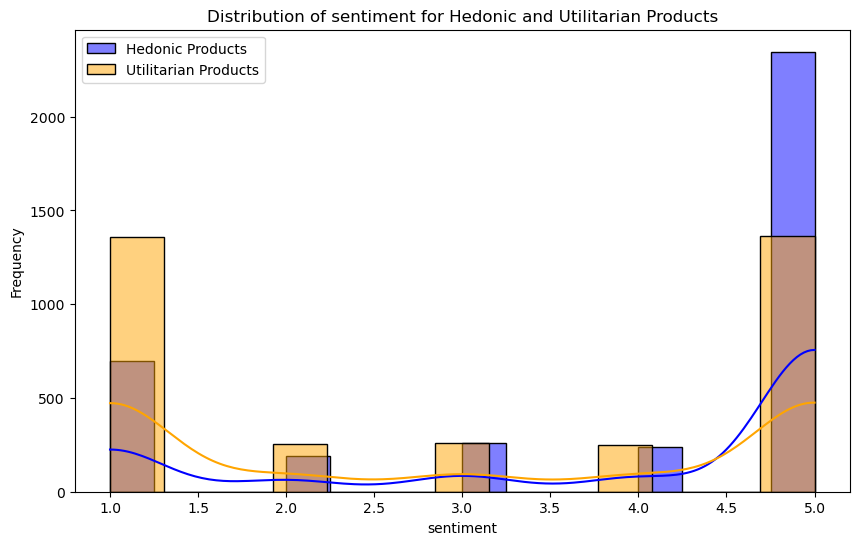

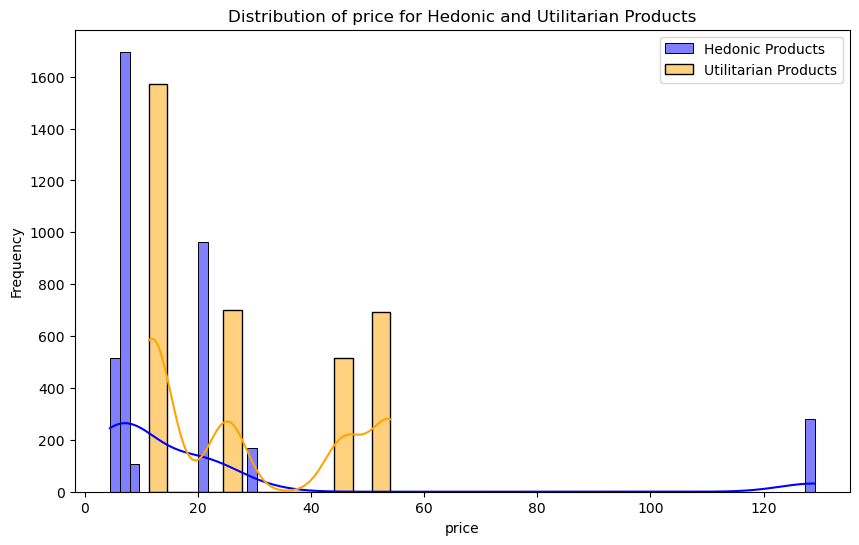

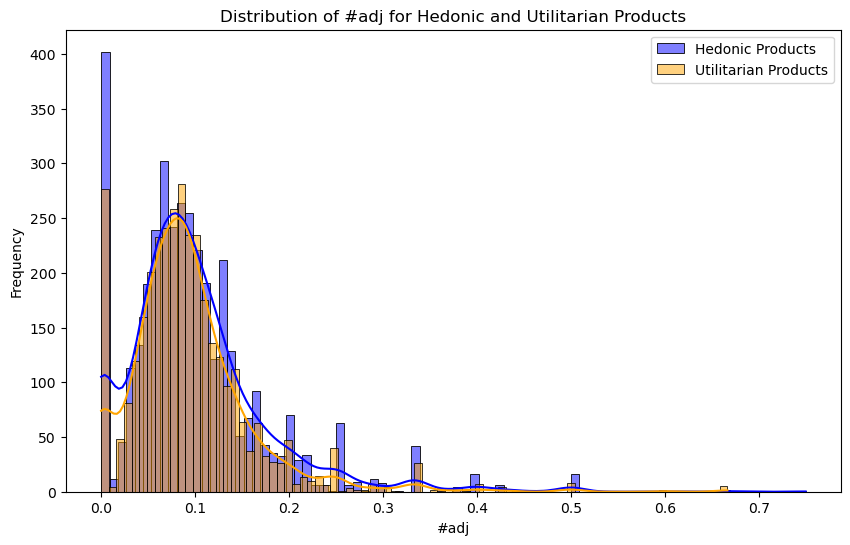

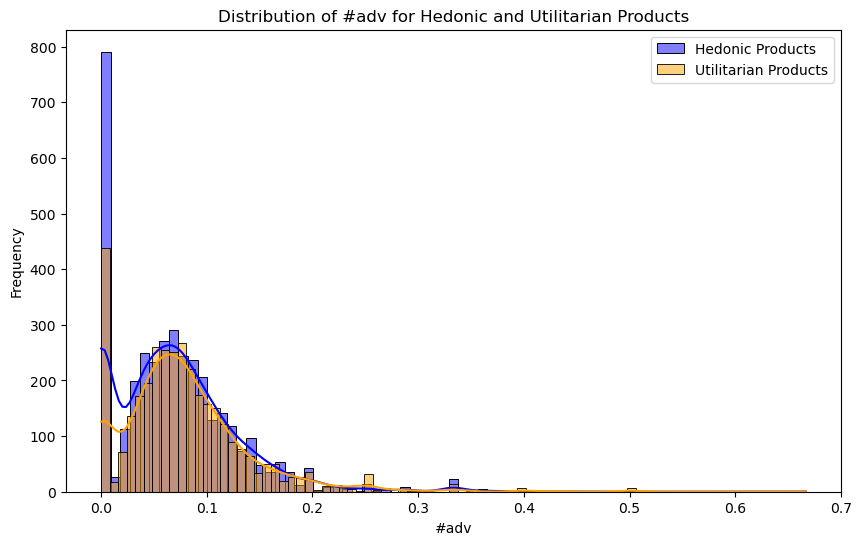

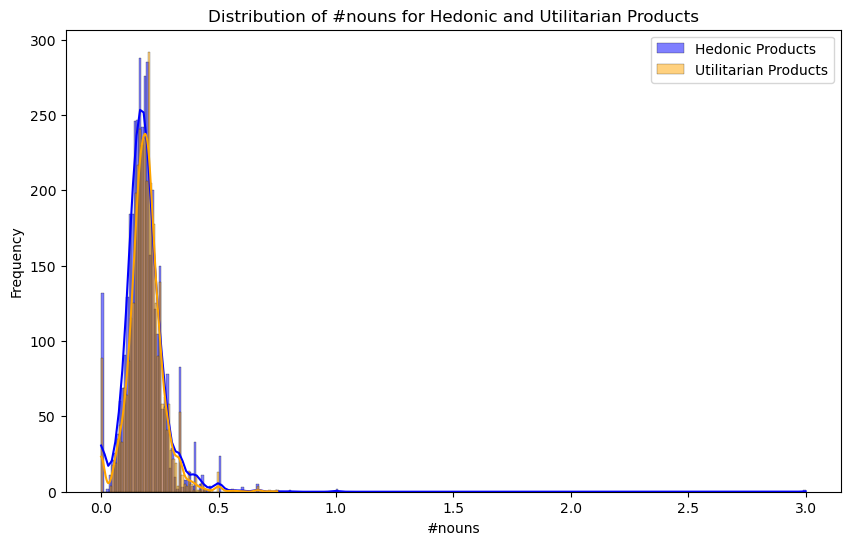

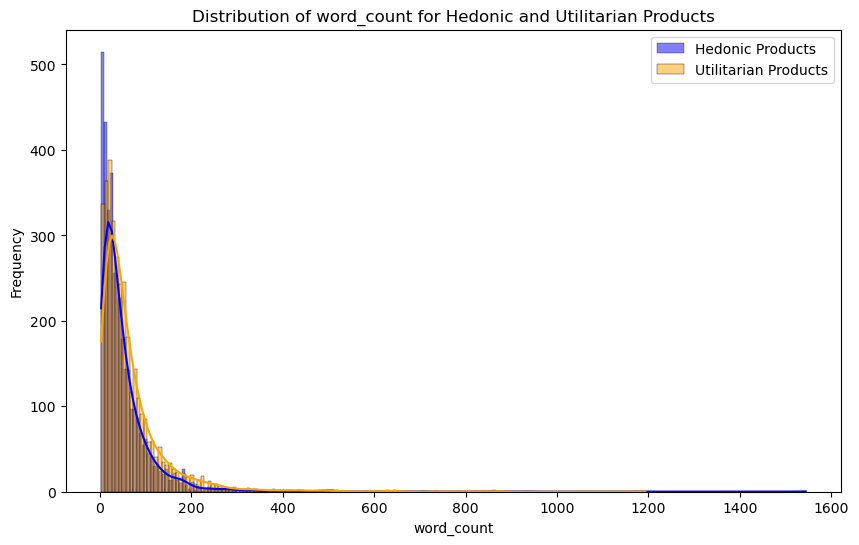

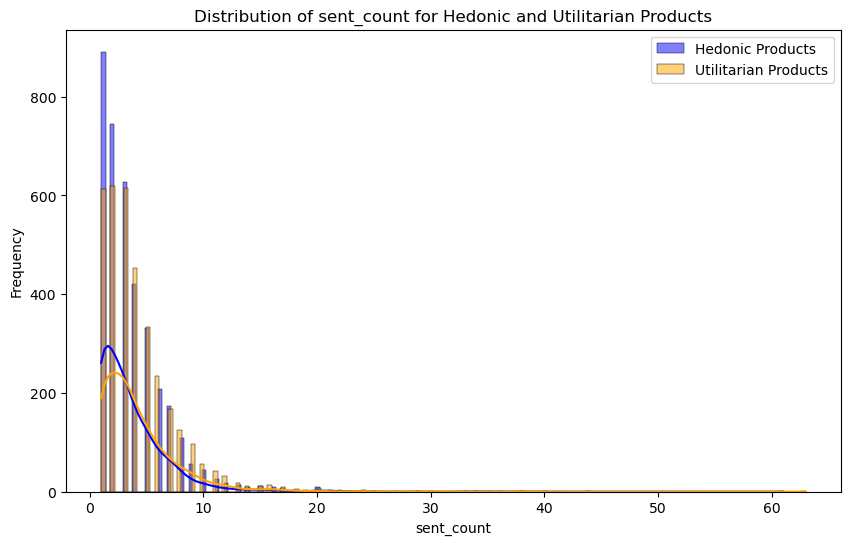

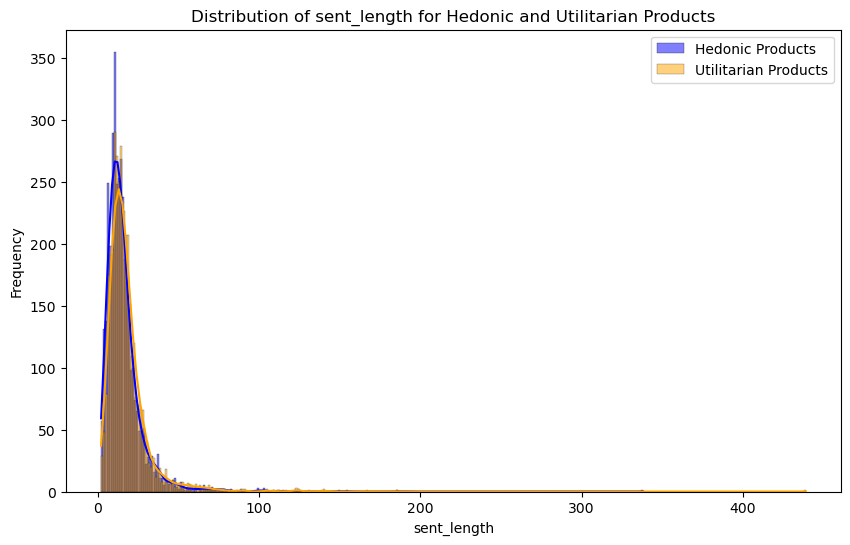

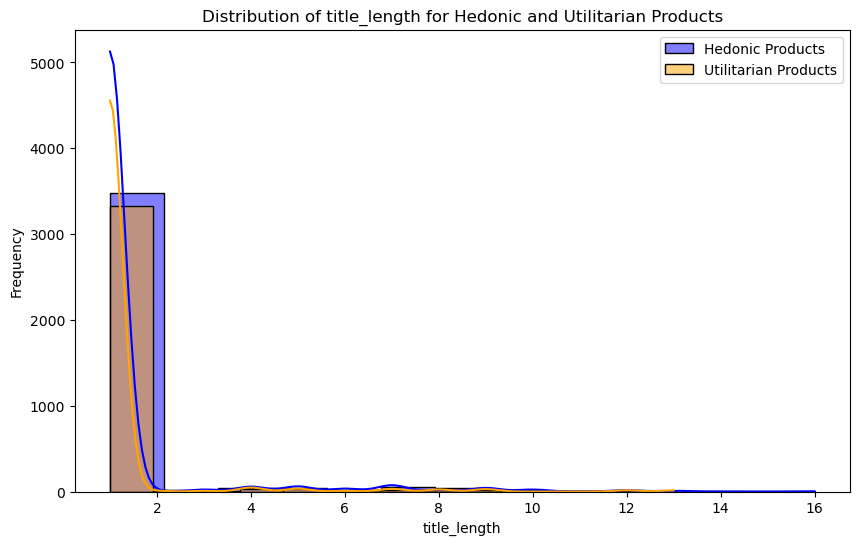

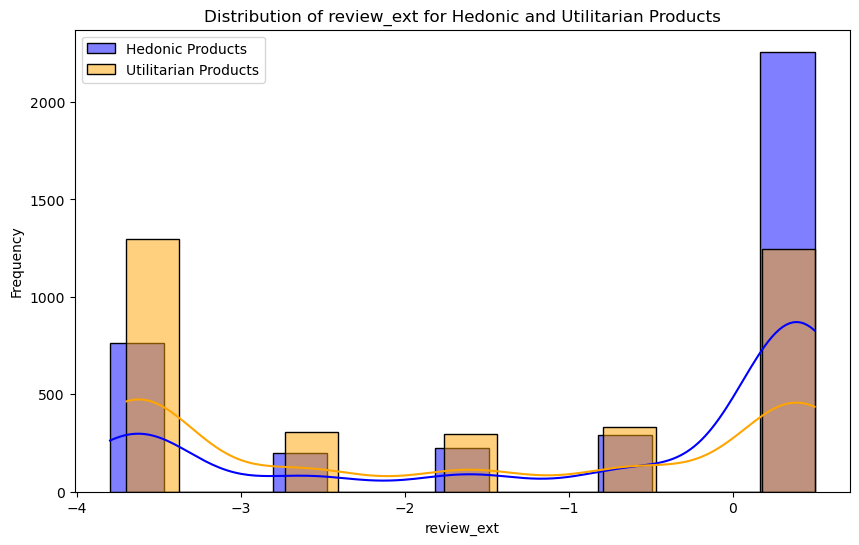

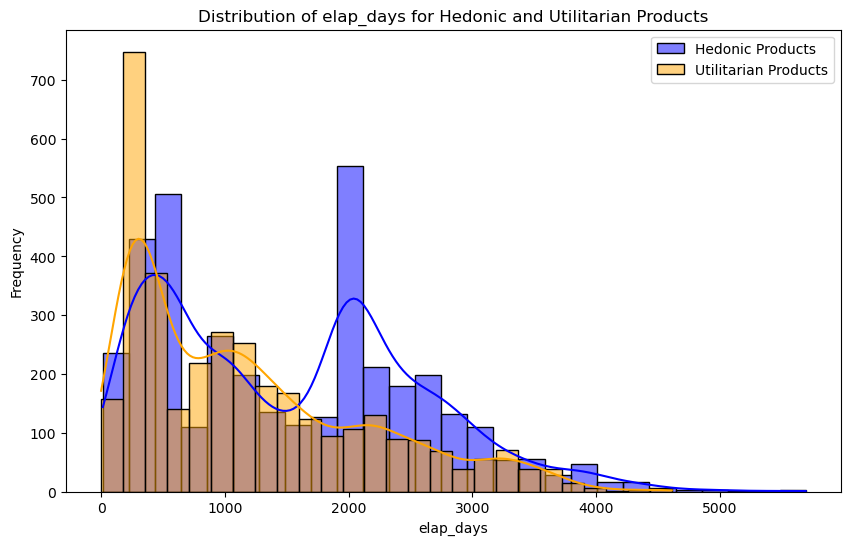

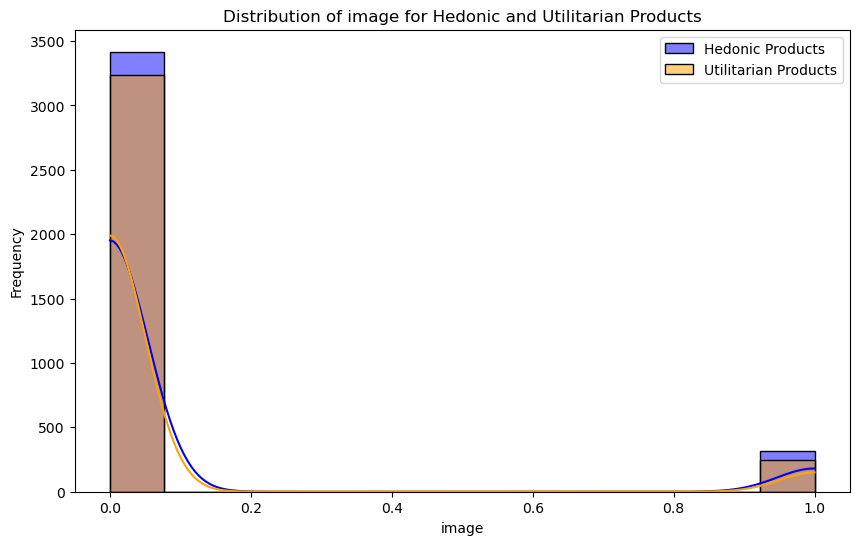

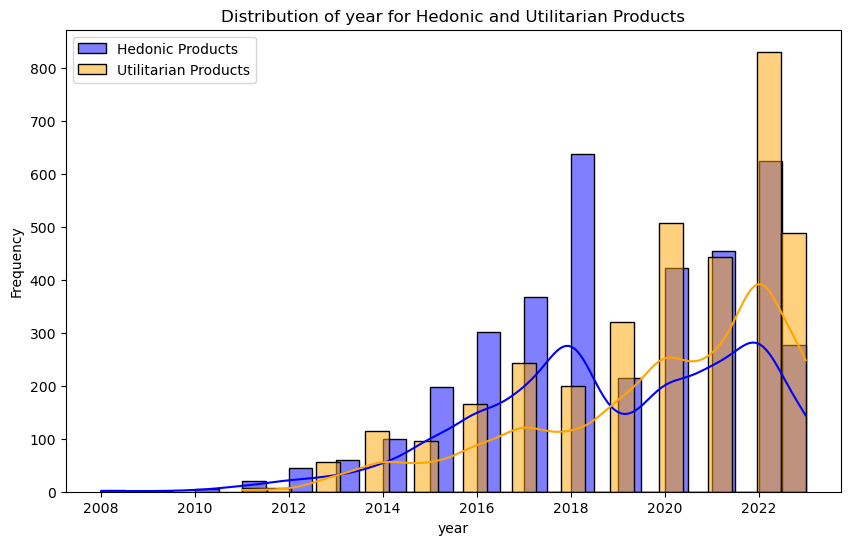

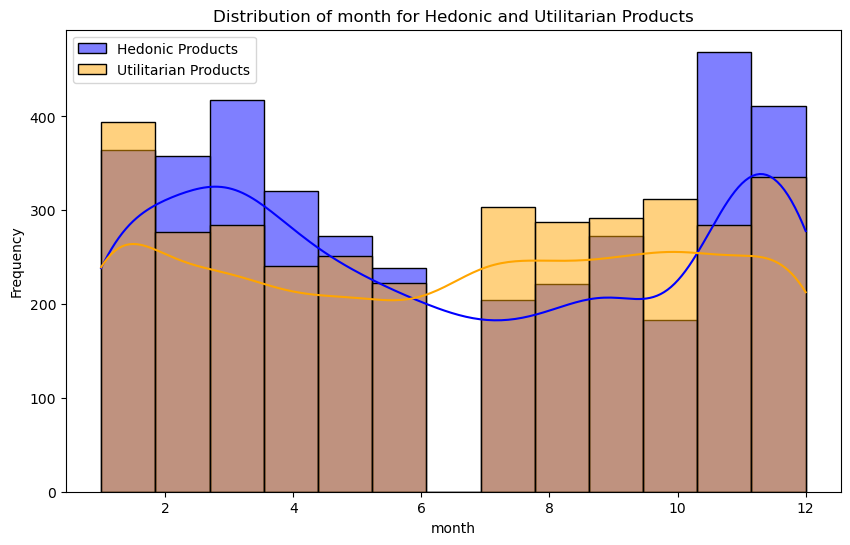

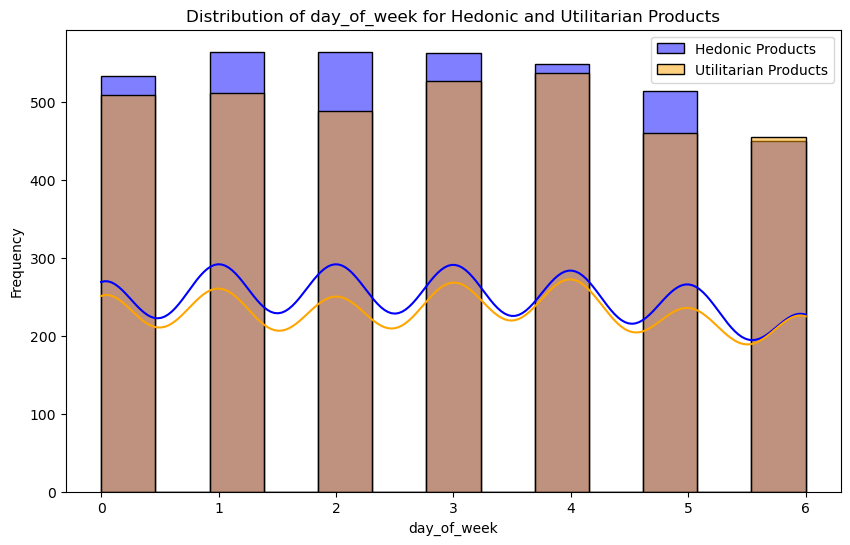

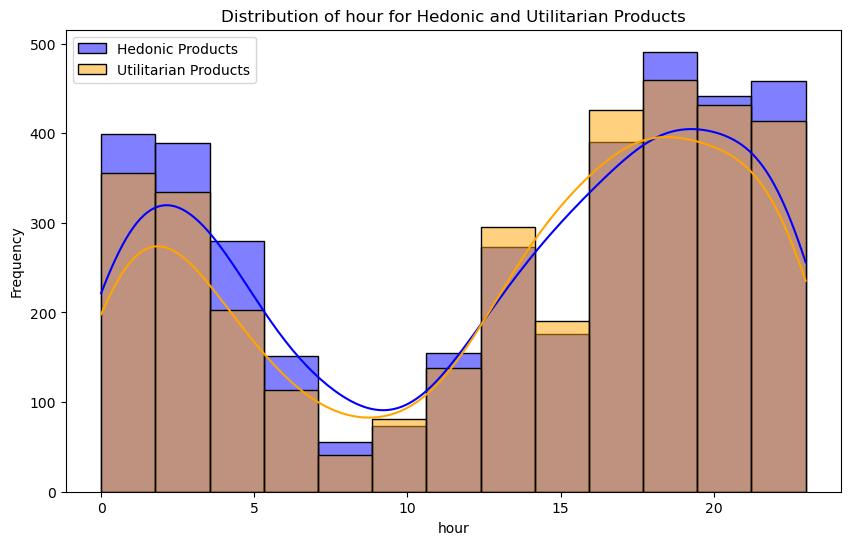

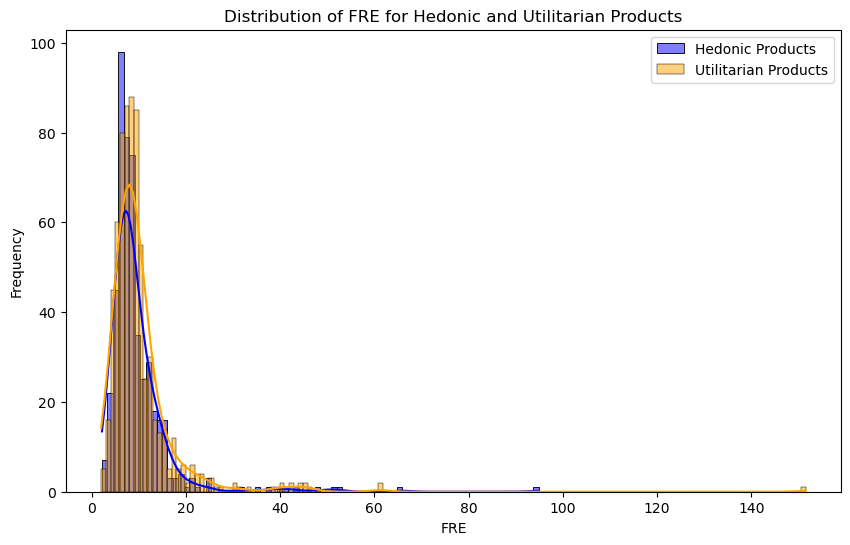

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day_of_week', 'hour','FRE'
]

# Subset the data to include only hedonic products
hedonic_data = data_hedonic[data_hedonic['helpful_vote'] != 0]

# Subset the data to include only utilitarian products
utilitarian_data = data_utilitarian[data_utilitarian['helpful_vote'] != 0]

# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(hedonic_data[feature], color='blue', kde=True, label='Hedonic Products')
    
    # Plot histogram for utilitarian products
    sns.histplot(utilitarian_data[feature], color='orange', kde=True, label='Utilitarian Products')
    
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


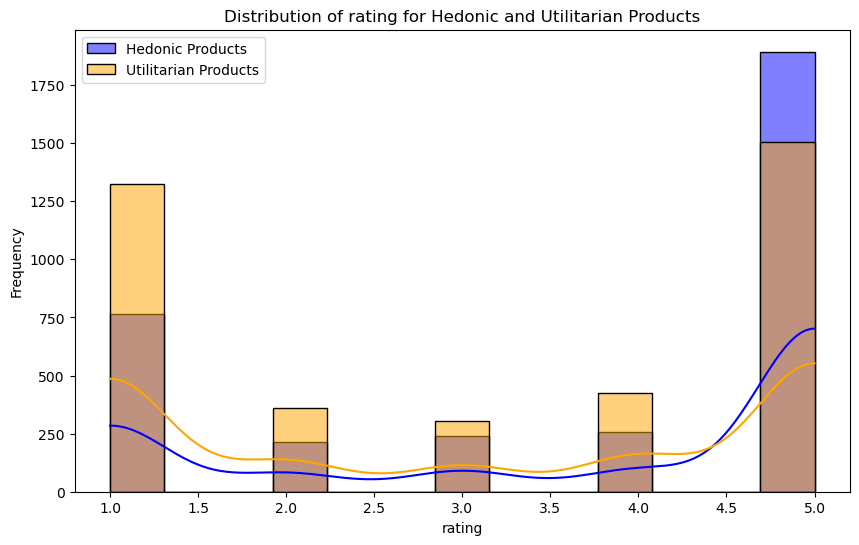

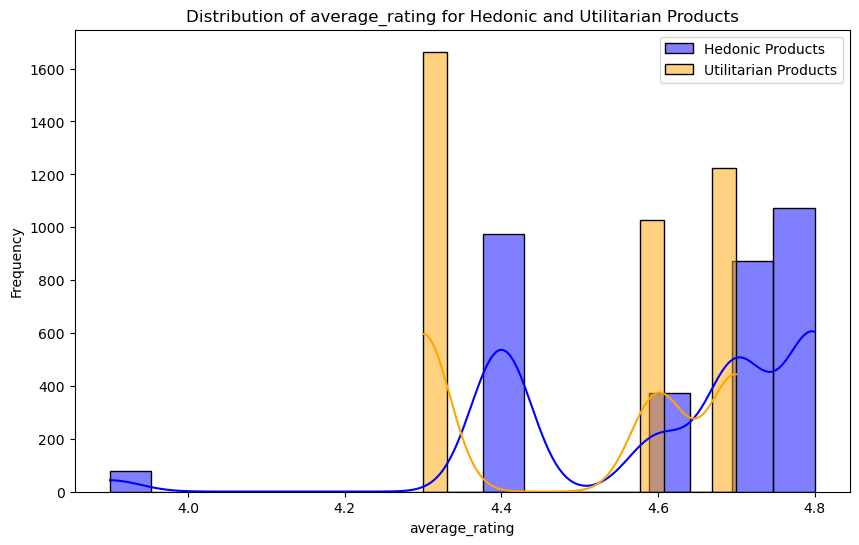

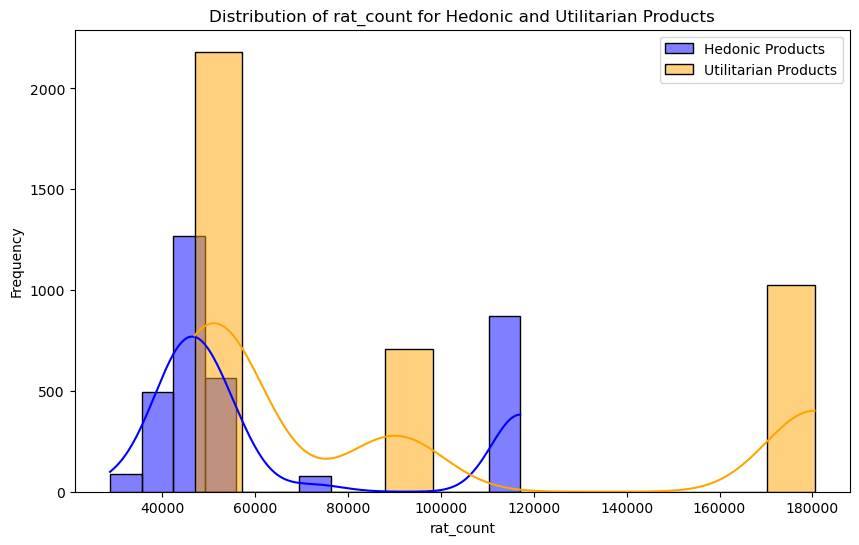

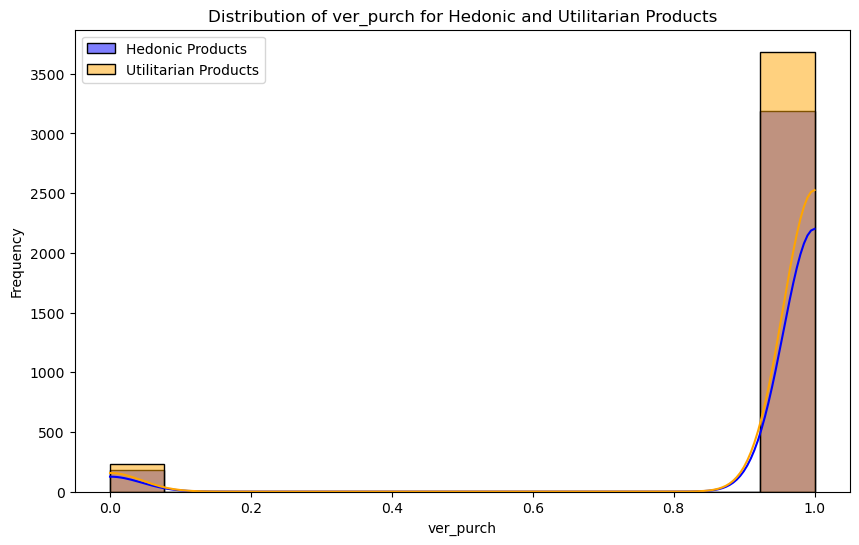

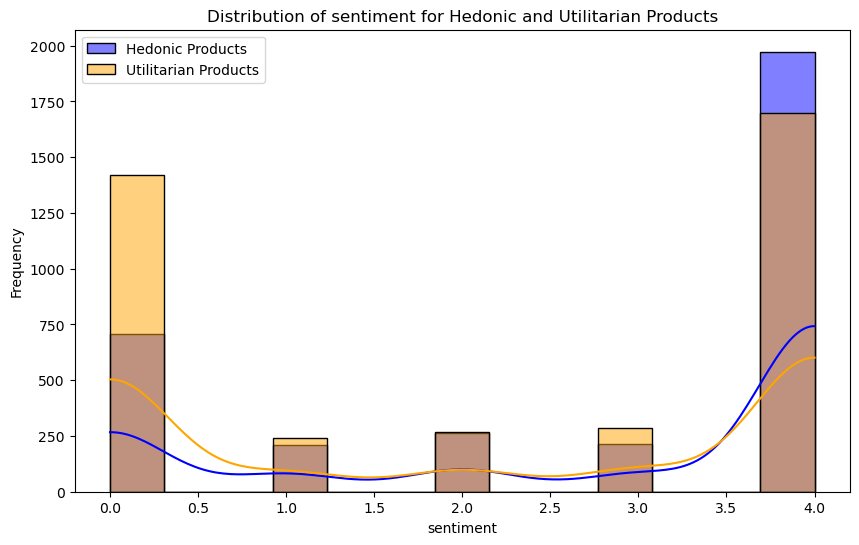

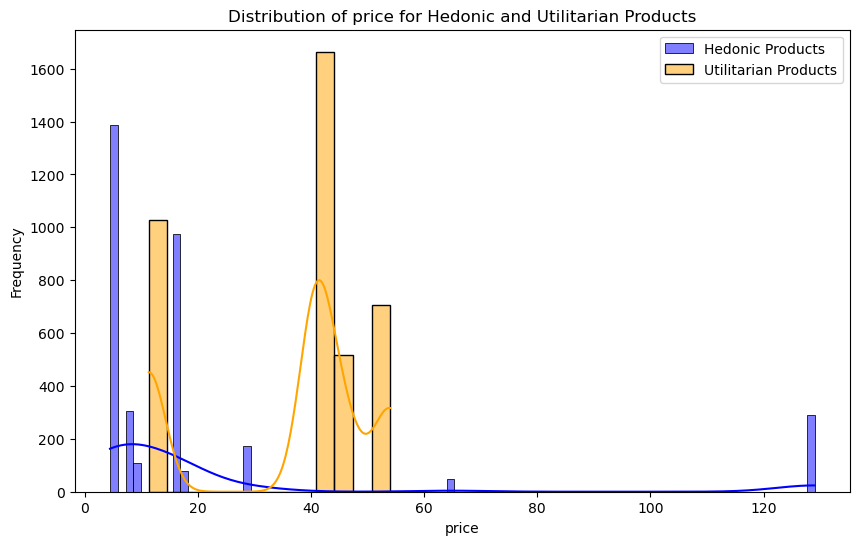

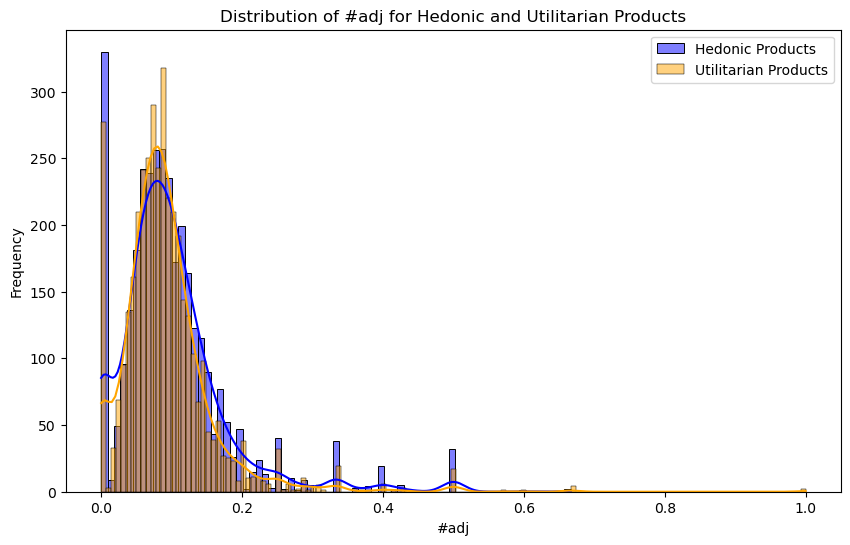

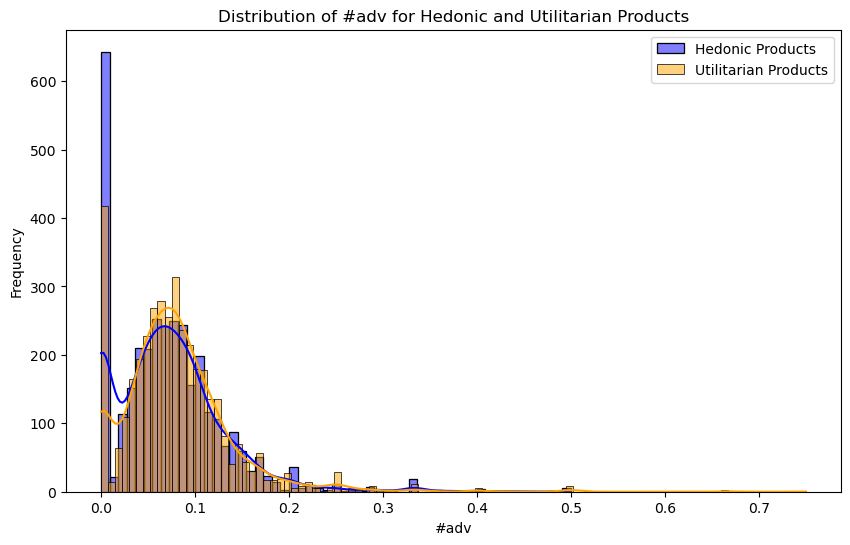

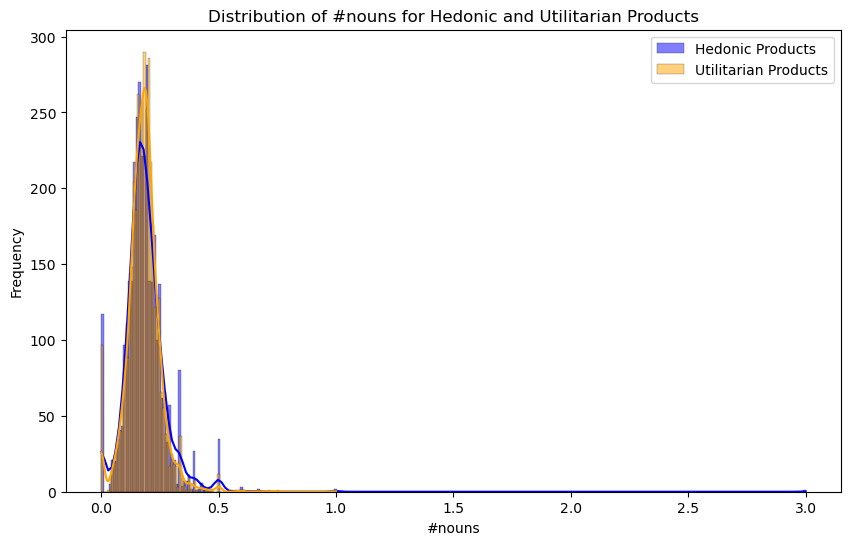

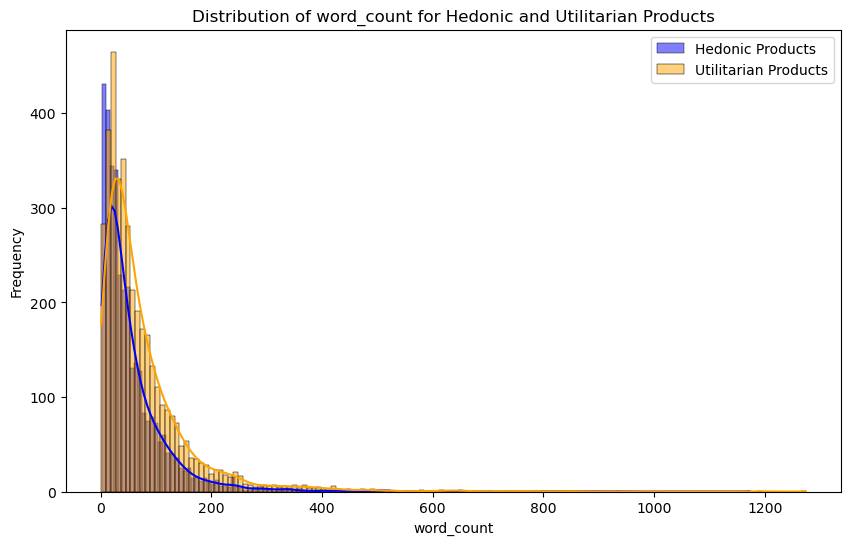

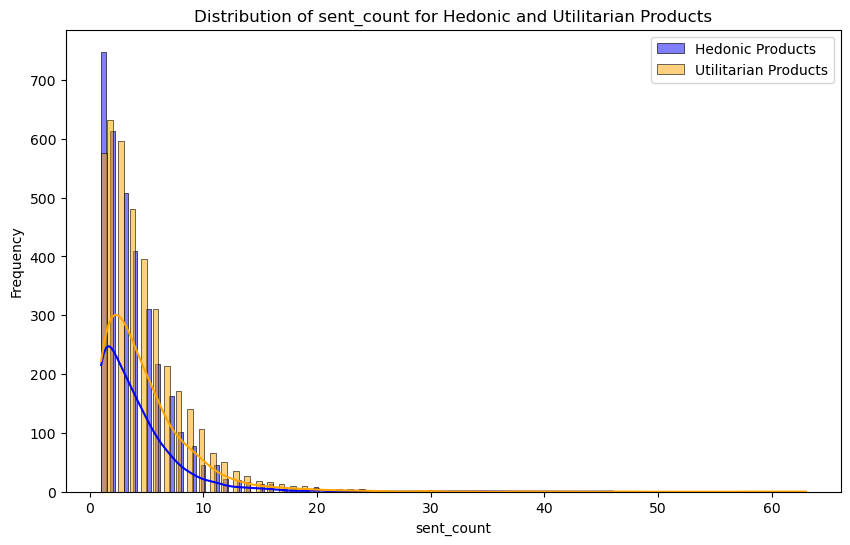

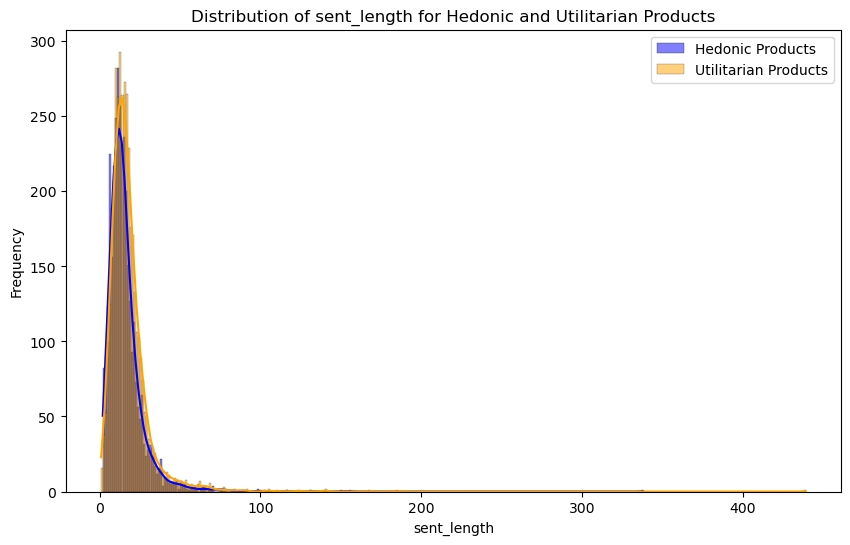

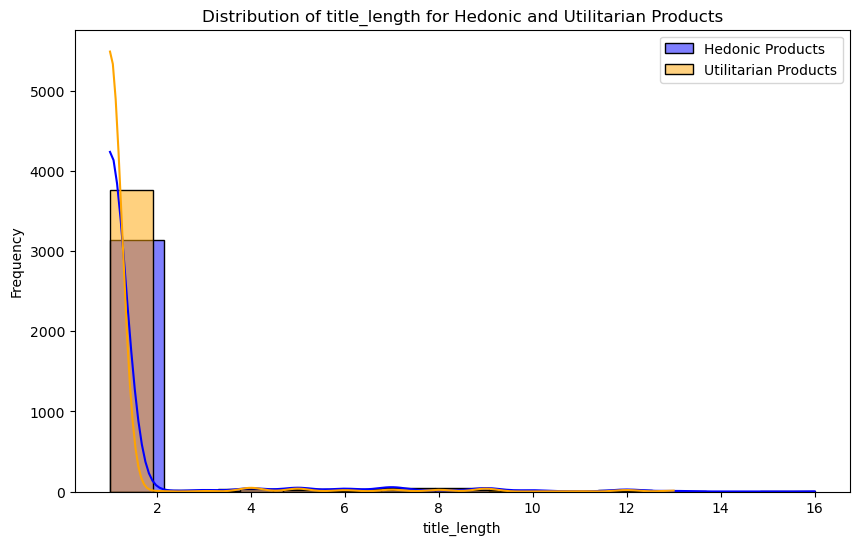

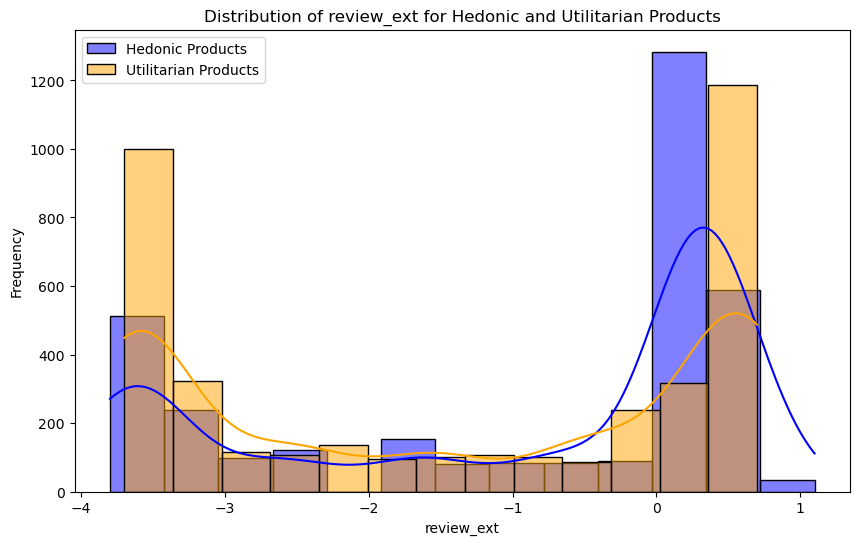

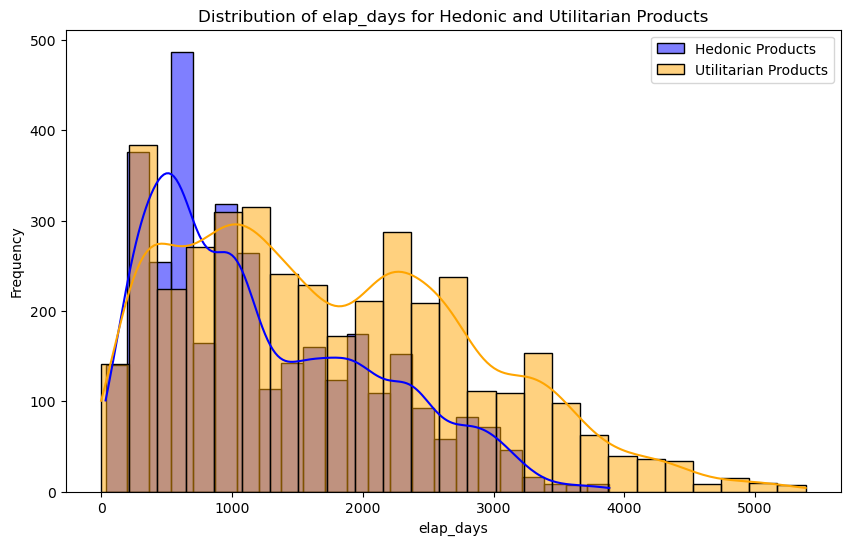

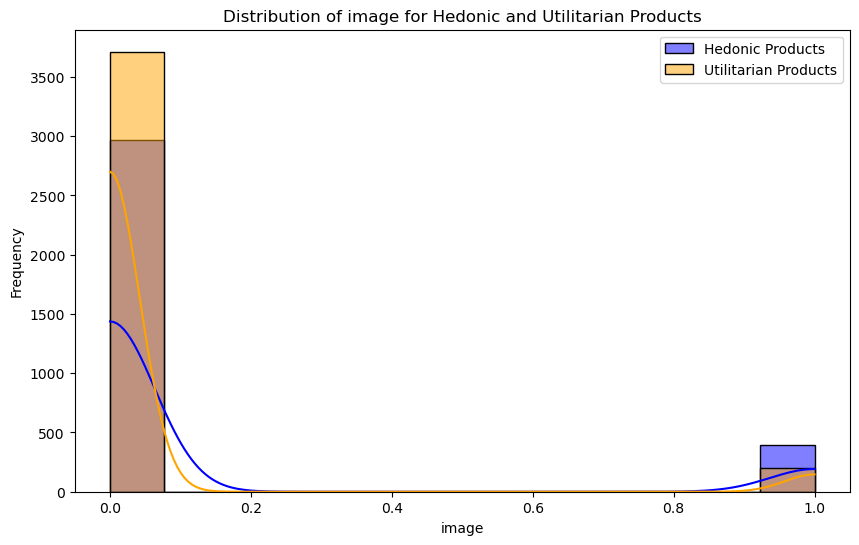

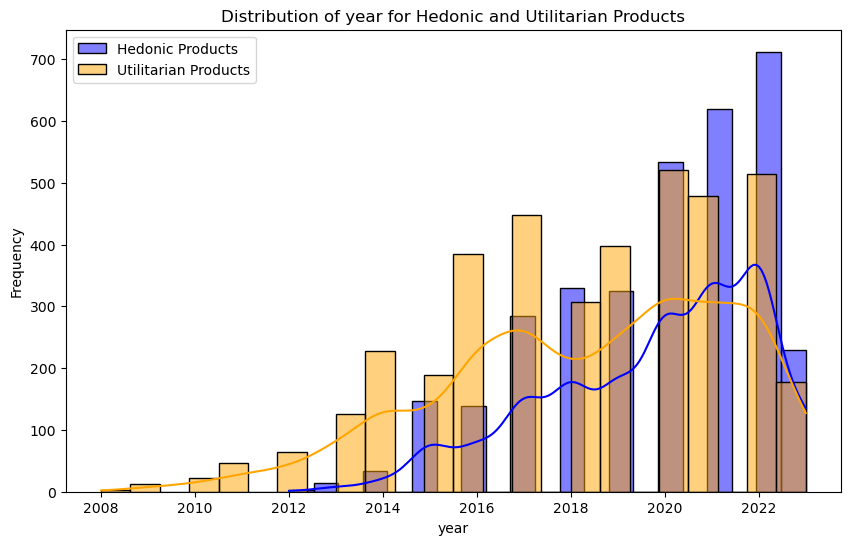

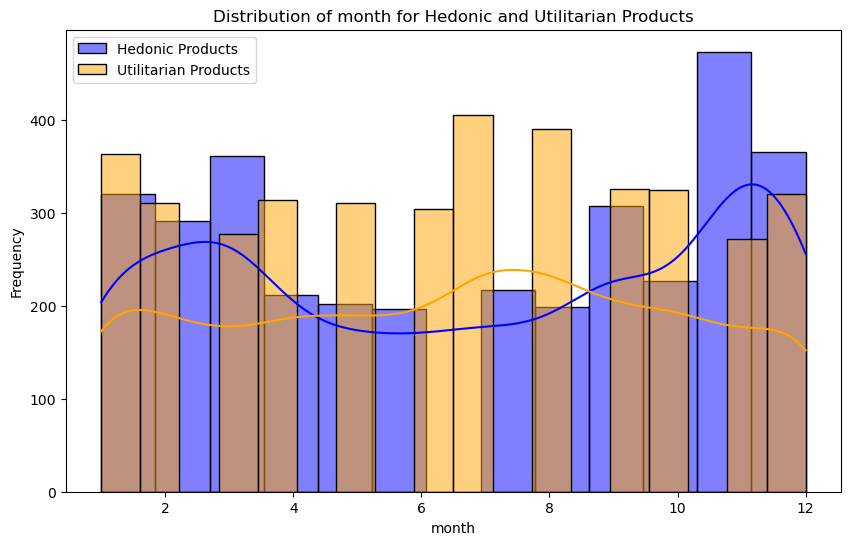

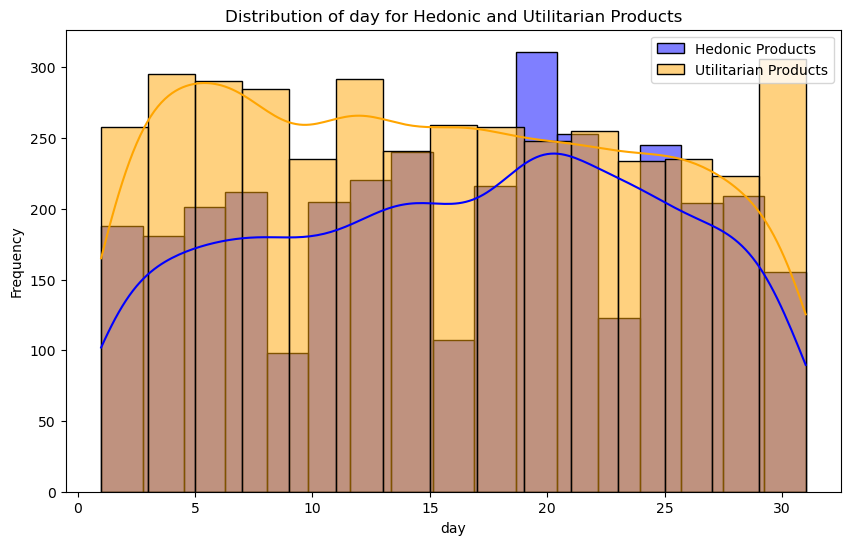

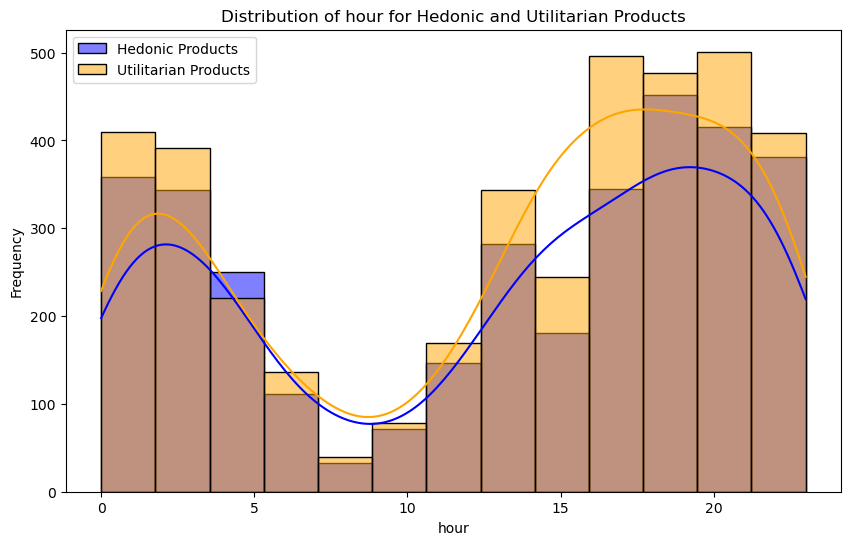

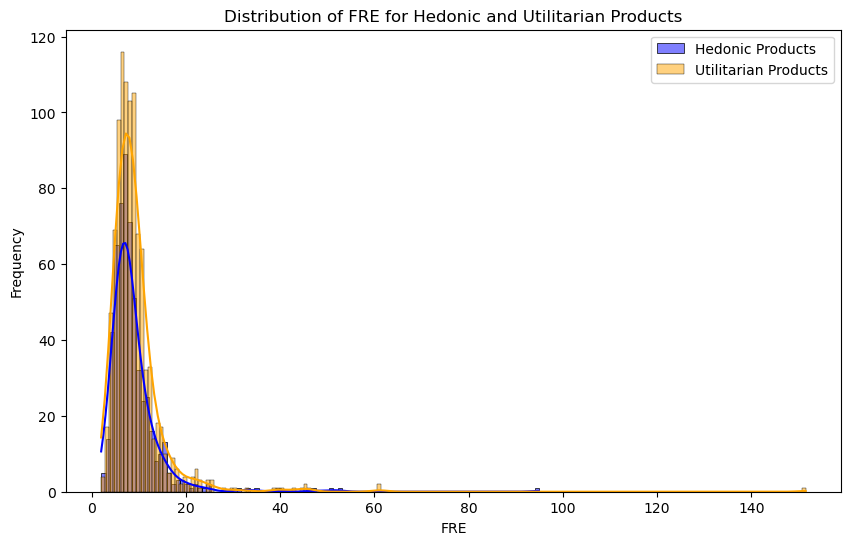

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day', 'hour','FRE'
]

# Subset the data to include only hedonic products
hedonic_data = data_hedonic[data_hedonic['helpful_vote'] != 0]

# Subset the data to include only utilitarian products
utilitarian_data = data_utilitarian[data_utilitarian['helpful_vote'] != 0]

# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(hedonic_data[feature], color='blue', kde=True, label='Hedonic Products')
    
    # Plot histogram for utilitarian products
    sns.histplot(utilitarian_data[feature], color='orange', kde=True, label='Utilitarian Products')
    
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

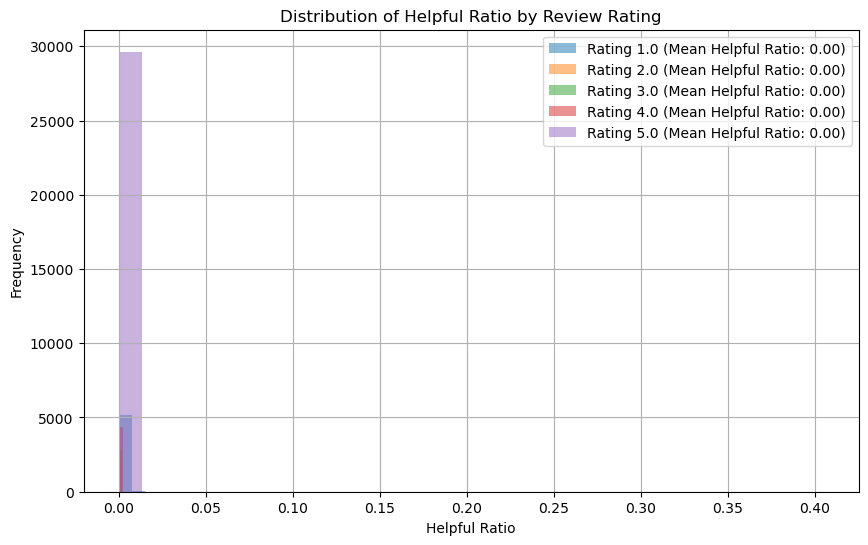

In [17]:
import matplotlib.pyplot as plt
data_hedonic = data_hedonic[data_hedonic['helpful_vote'] != 0]

# Group the data by rating and calculate the mean helpful ratio for each rating
mean_helpful_ratio_by_rating = data_hedonic.groupby('rating')['helpful_ratio'].mean()

# Plot a histogram
plt.figure(figsize=(10, 6))
for rating, mean_helpful_ratio in mean_helpful_ratio_by_rating.items():
    plt.hist(data[data['rating'] == rating]['helpful_ratio'], bins=30, alpha=0.5, label=f'Rating {rating} (Mean Helpful Ratio: {mean_helpful_ratio:.2f})')

plt.title('Distribution of Helpful Ratio by Review Rating')
plt.xlabel('Helpful Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


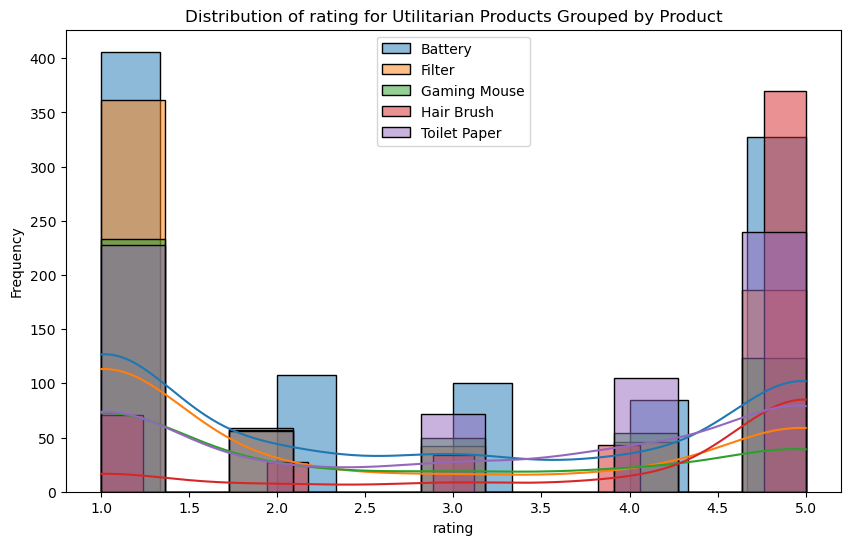

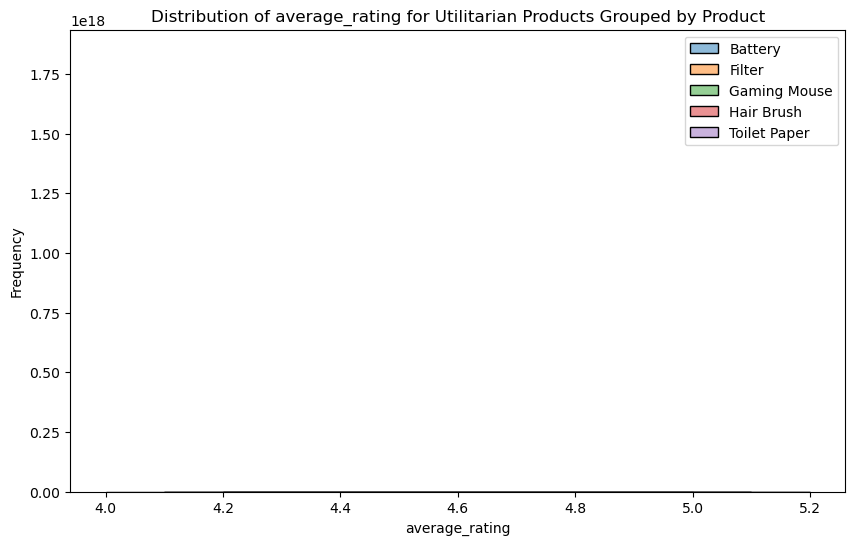

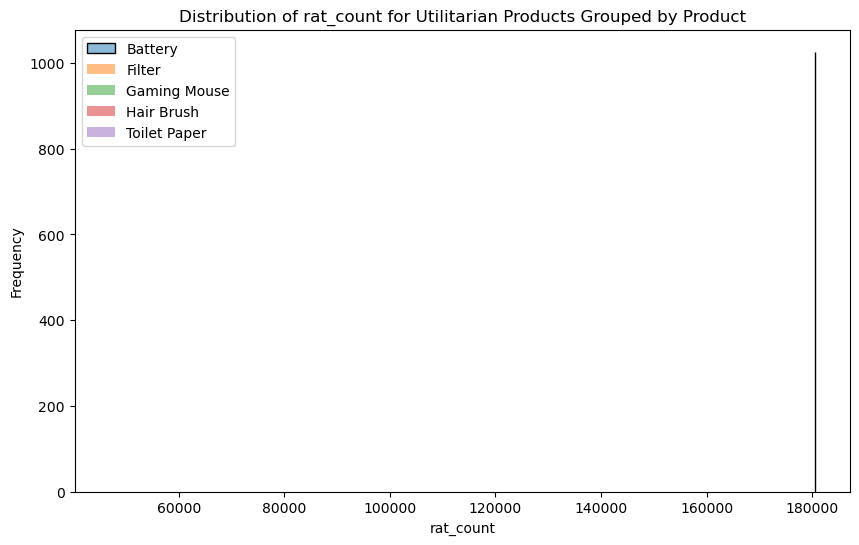

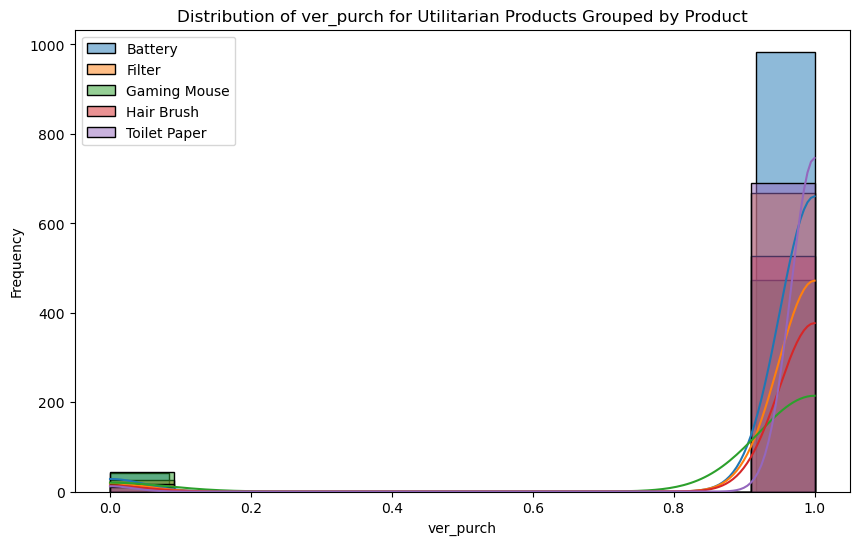

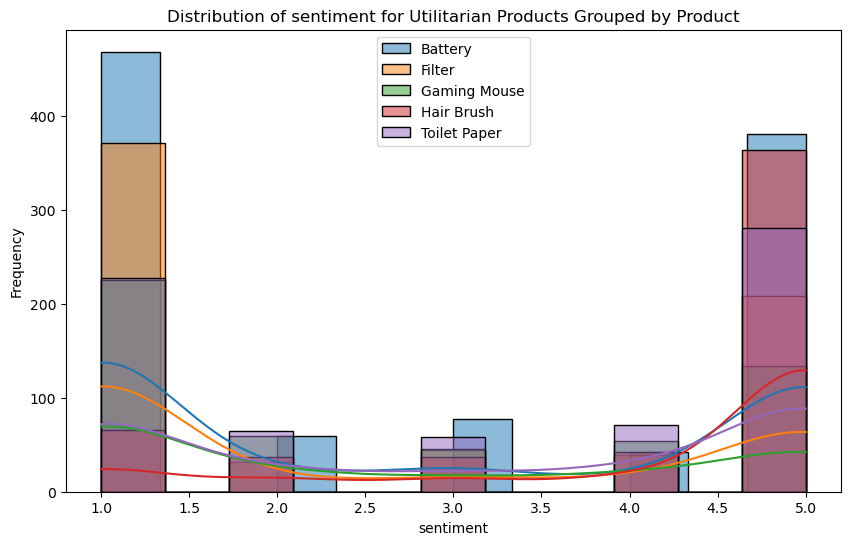

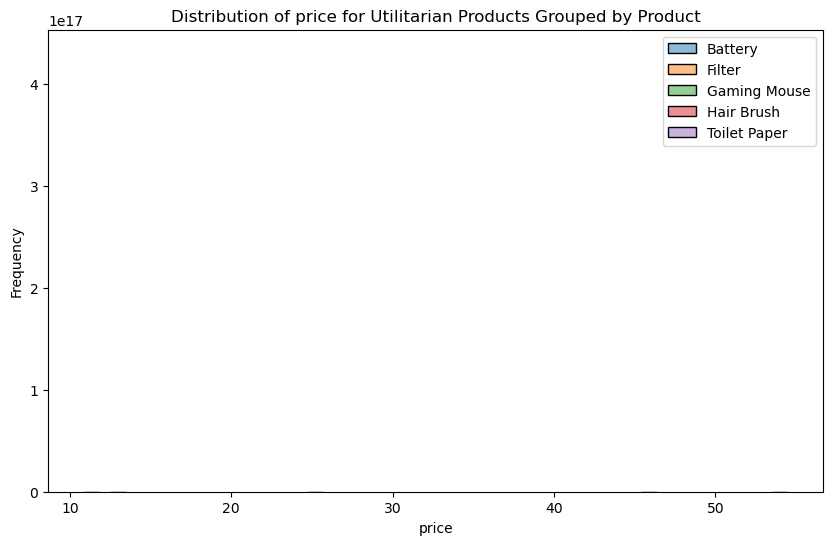

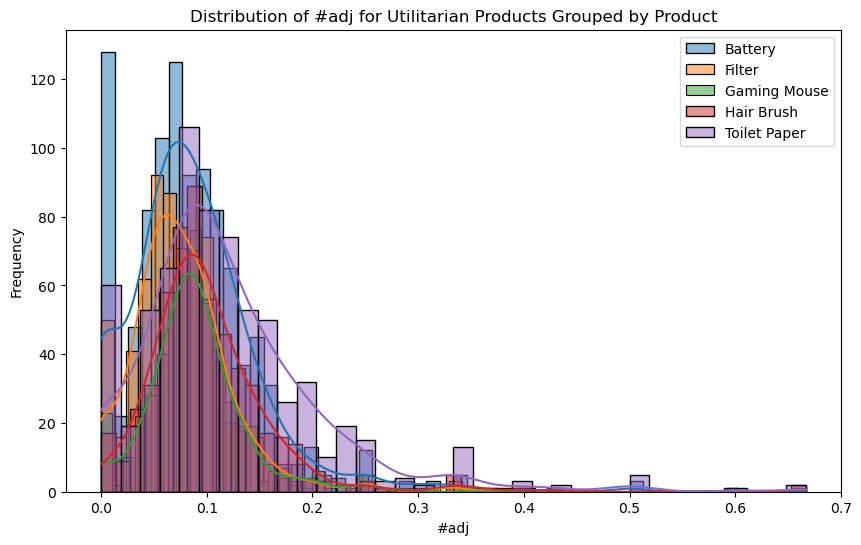

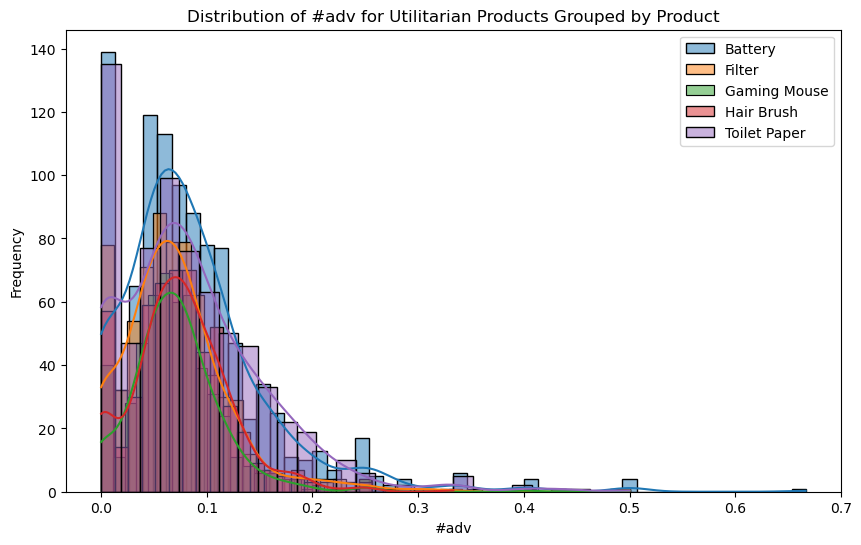

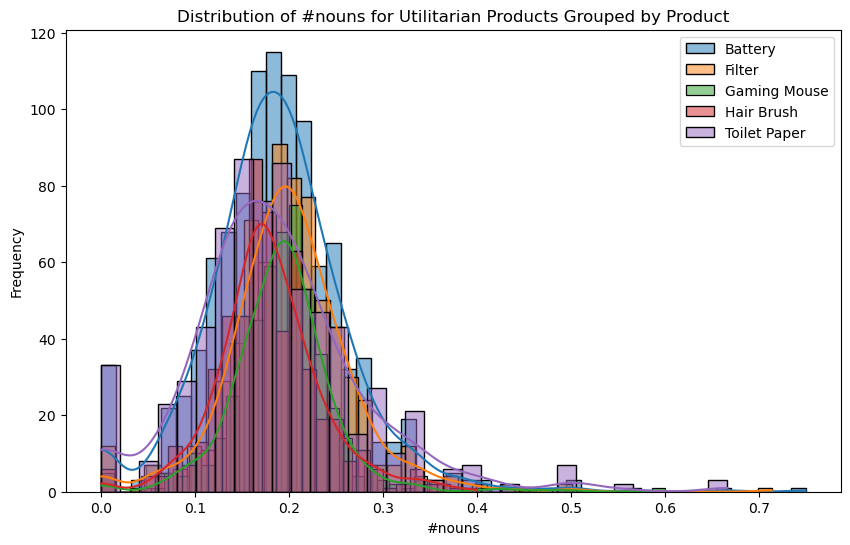

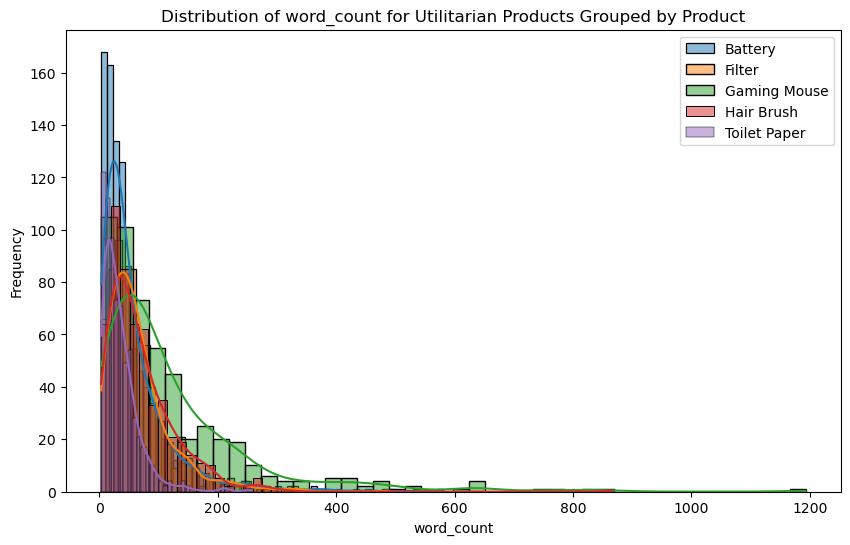

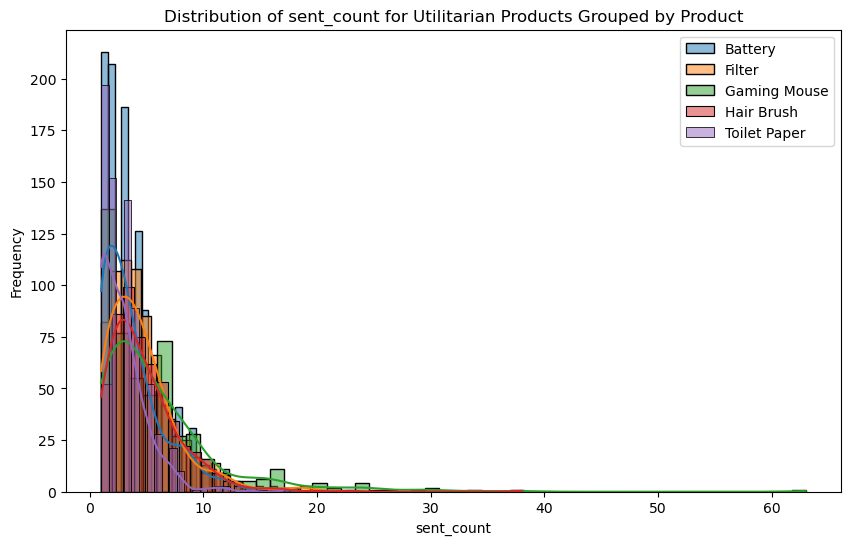

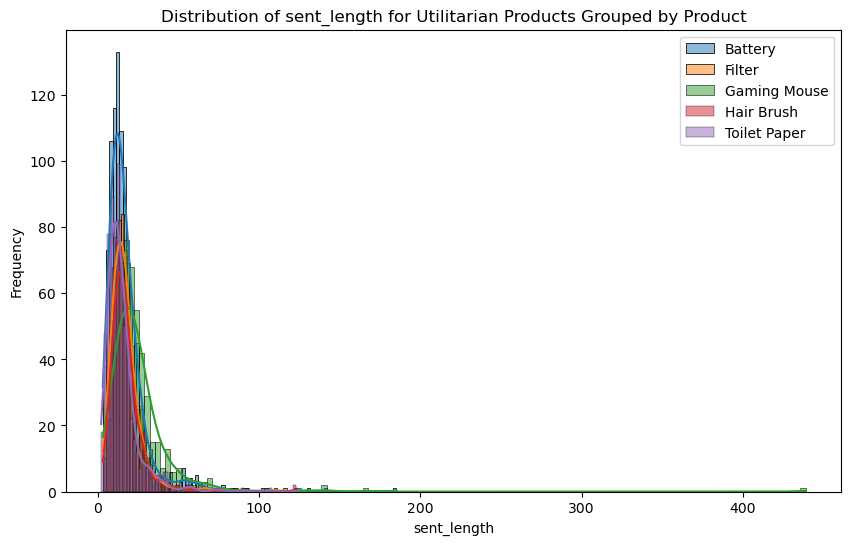

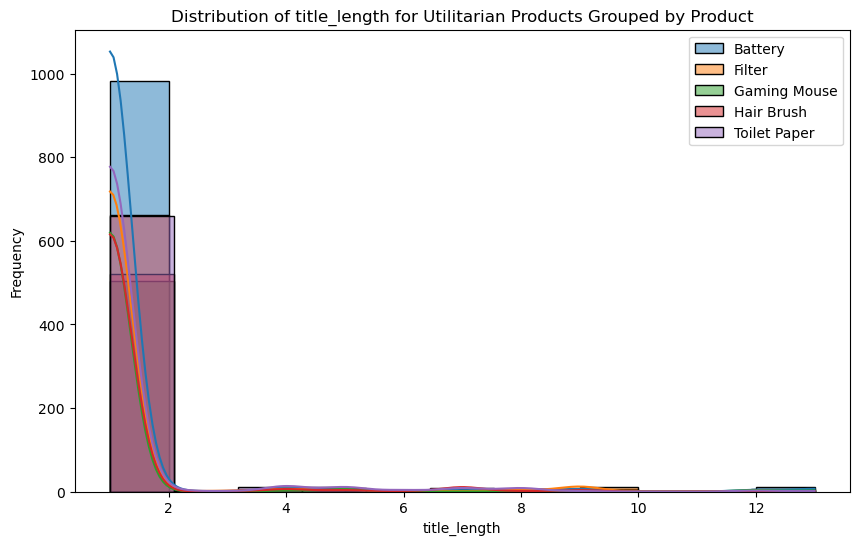

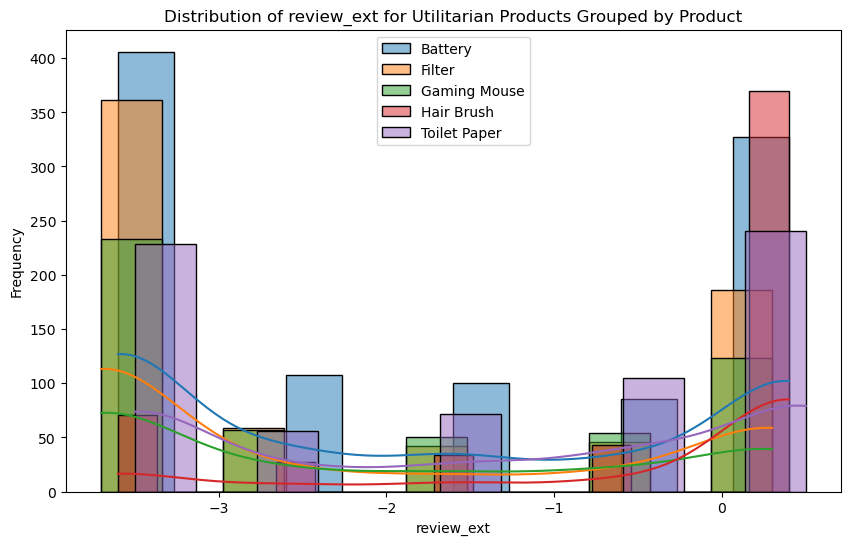

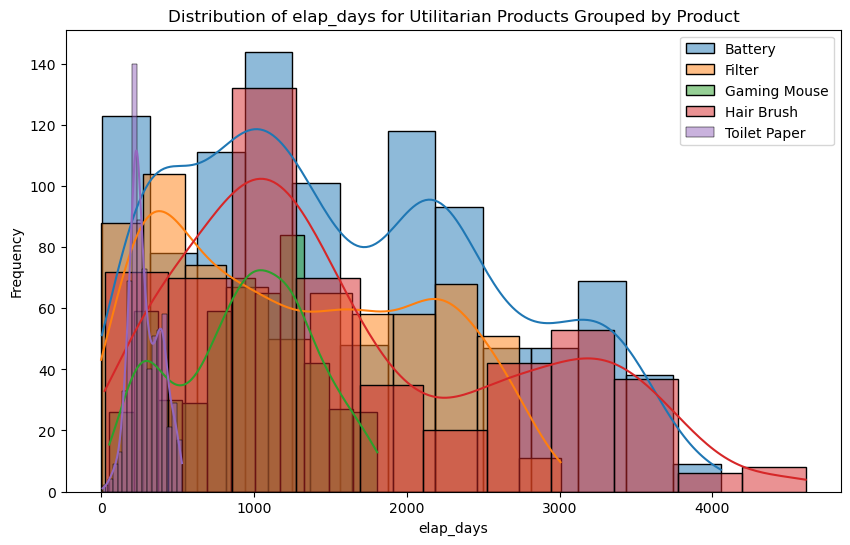

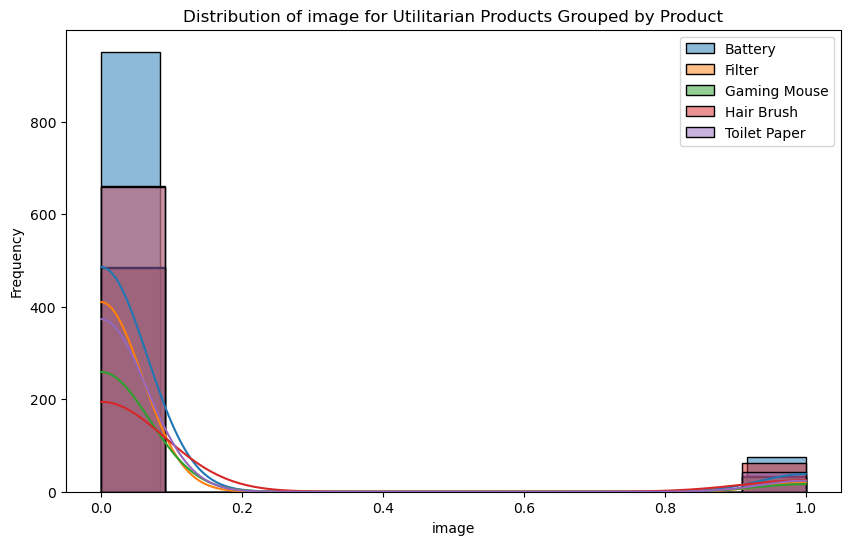

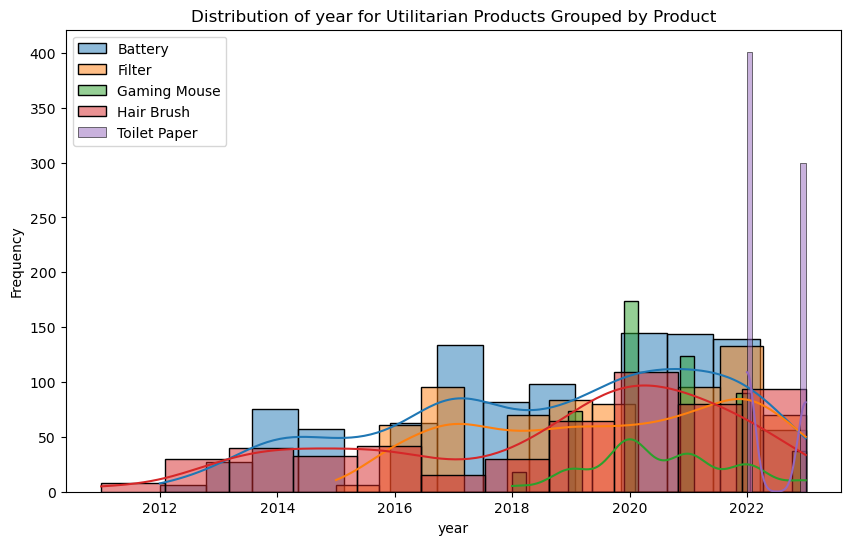

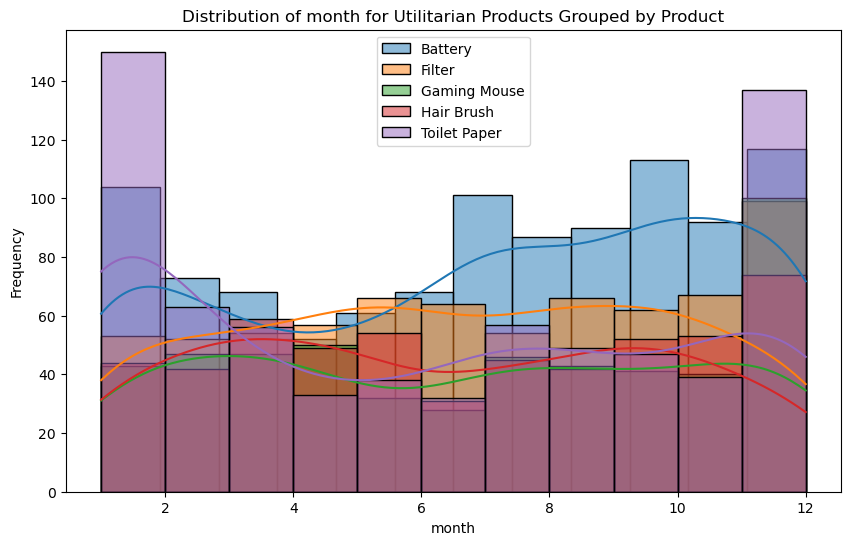

KeyError: 'day'

<Figure size 1000x600 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day', 'hour','FRE','subjective_score'
]

# Subset the data to include only hedonic products
grouped_data = data_utilitarian[data_utilitarian['helpful_vote'] != 0]
grouped_data = utilitarian_data[~utilitarian_data['product'].isin(['Razor'])]


# Group the data by product
grouped_data = grouped_data.groupby('product')

# Visualize the distribution of each feature for hedonic products grouped by product
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Loop through each unique product
    for product, group in grouped_data:
        sns.histplot(group[feature], kde=True, label=product)
    
    plt.title(f'Distribution of {feature} for Utilitarian Products Grouped by Product')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
